In [96]:
#Importing basics


import numpy as np
import pandas as pd
import seaborn as sns
from nltk.tokenize import word_tokenize, sent_tokenize
from collections import Counter 
import re
from transformers import (
    AutoModelForSequenceClassification,
    AutoTokenizer,
    TrainingArguments,
    Trainer,
)
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt

In [173]:
wnba_data = pd.read_csv('wnba_data.csv') #Importing WNBA dataset
wnba_data.head()

,Player,Team,Pos,G,MP,G.1,GS,MP.1,FG,FGA,...,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Natalie Achonwa,MIN,F,22,332,22,0,15.1,2.1,4.1,...,1.2,0.815,1.1,4.1,1.7,0.4,0.3,1.0,1.6,5.3
1,Julie Allemand,CHI,G,25,402,25,4,16.1,1.0,2.4,...,0.7,0.833,0.4,1.6,3.4,0.6,0.1,1.3,0.9,3.0
2,Lindsay Allen,MIN,G,9,134,9,0,14.9,2.2,4.2,...,1.4,0.923,0.0,1.6,3.4,0.2,0.0,0.8,1.2,6.7
3,Rebecca Allen,NYL,G,25,523,25,19,20.9,2.6,6.8,...,1.0,0.833,0.3,3.4,1.2,0.8,1.0,1.0,1.9,7.0
4,Yvonne Anderson,CON,G,11,101,11,0,9.2,1.1,2.4,...,0.6,1.000,0.3,0.8,1.1,0.3,0.2,1.0,1.3,3.2


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885 entries, 0 to 884
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  885 non-null    object 
 1   Team    885 non-null    object 
 2   Pos     885 non-null    object 
 3   G       885 non-null    int64  
 4   MP      885 non-null    int64  
 5   G.1     885 non-null    int64  
 6   GS      885 non-null    int64  
 7   MP.1    885 non-null    float64
 8   FG      885 non-null    float64
 9   FGA     885 non-null    float64
 10  FG%     864 non-null    float64
 11  3P      885 non-null    float64
 12  3PA     885 non-null    float64
 13  3P%     757 non-null    float64
 14  2P      885 non-null    float64
 15  2PA     885 non-null    float64
 16  2P%     855 non-null    float64
 17  FT      885 non-null    float64
 18  FTA     885 non-null    float64
 19  FT%     801 non-null    float64
 20  ORB     885 non-null    float64
 21  TRB     885 non-null

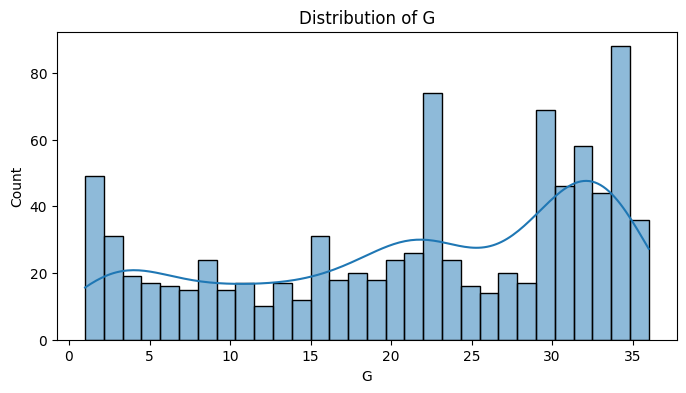

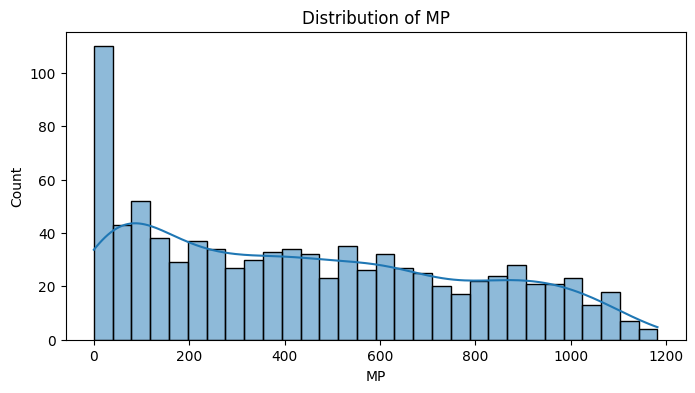

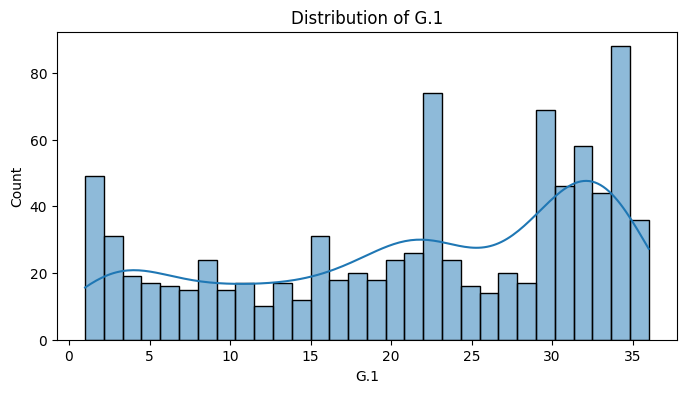

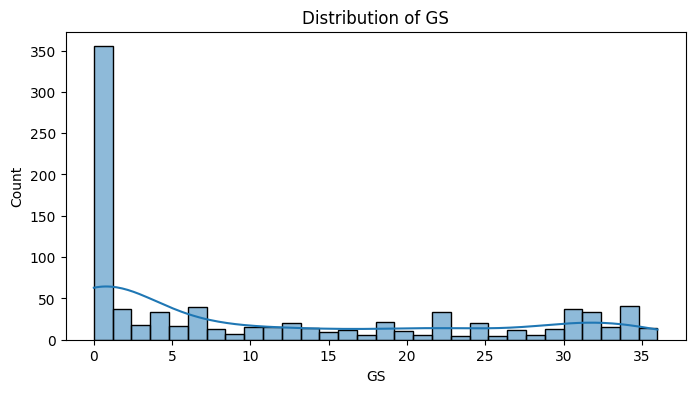

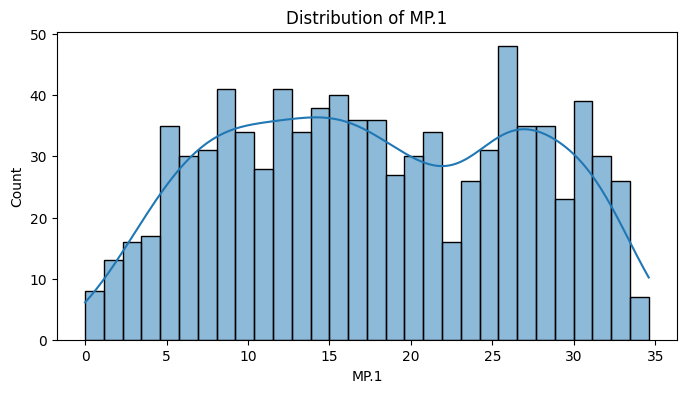

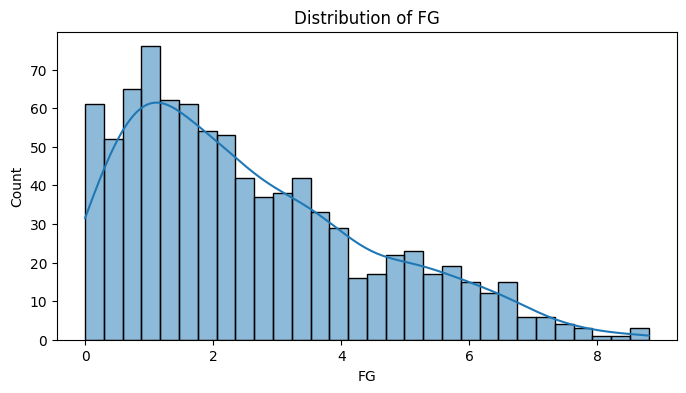

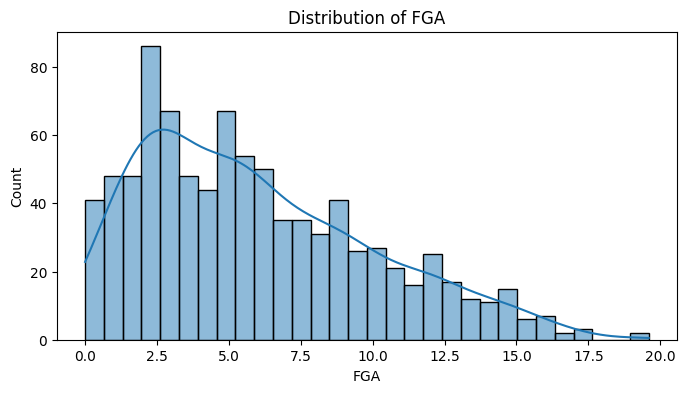

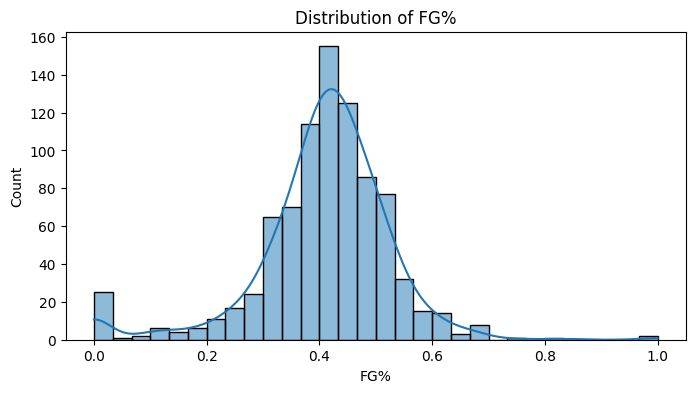

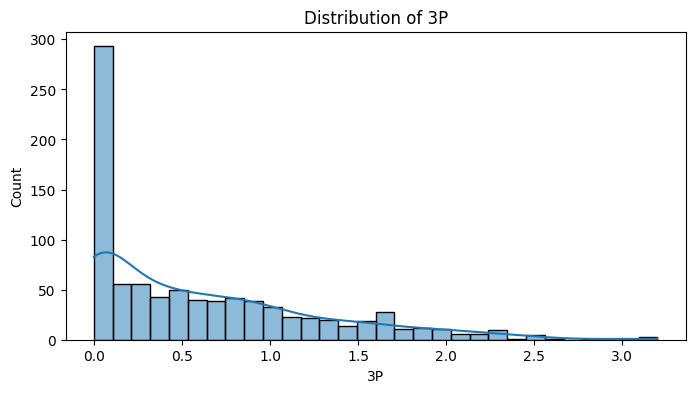

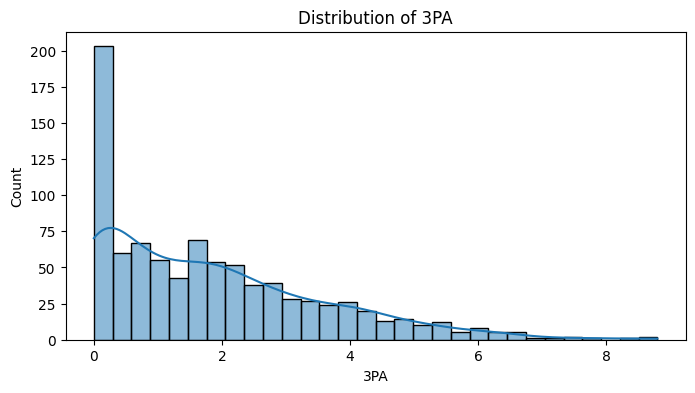

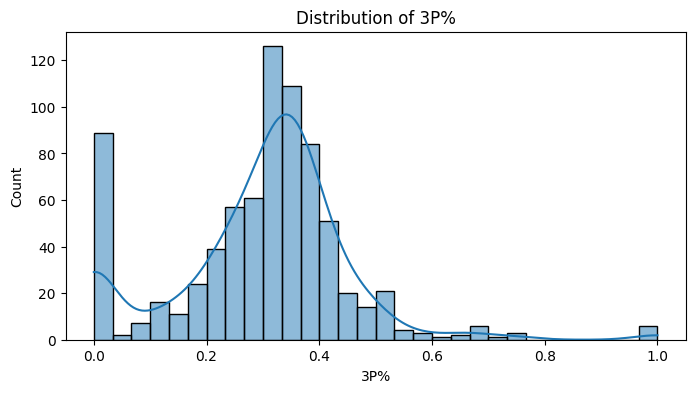

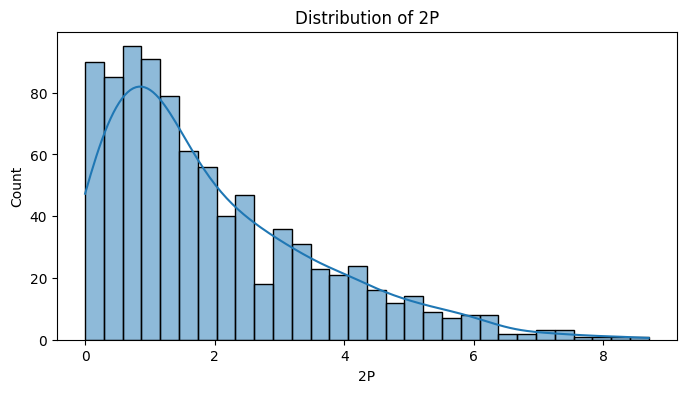

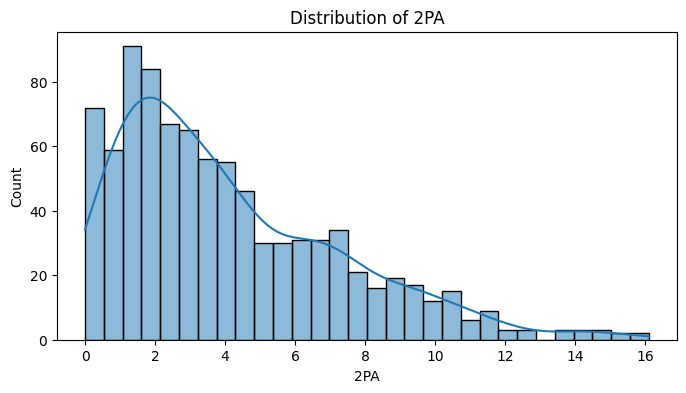

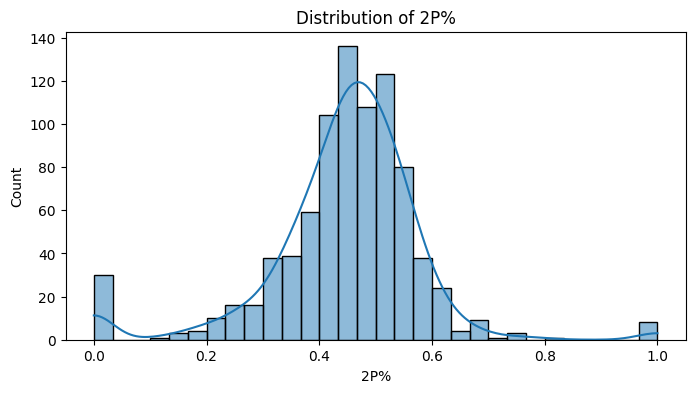

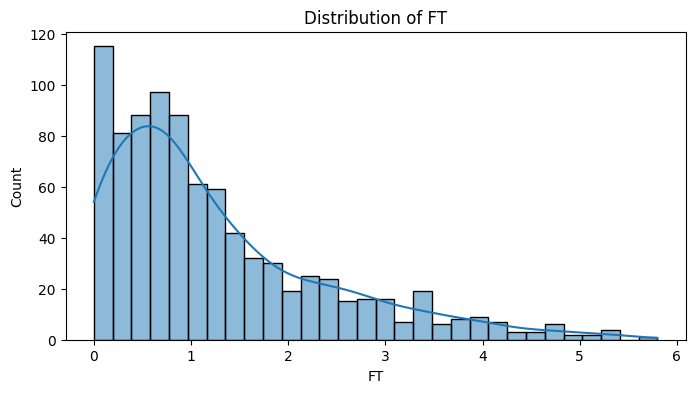

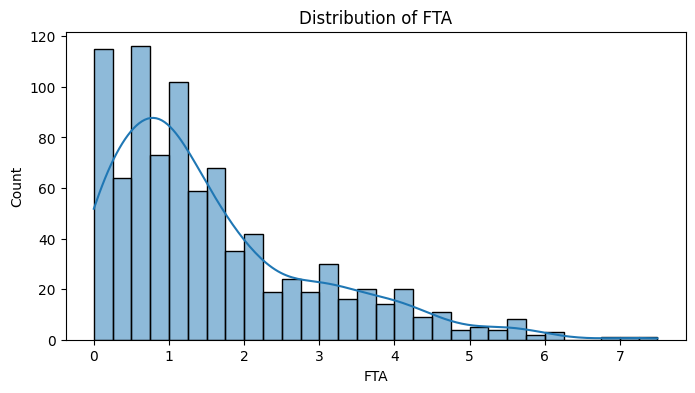

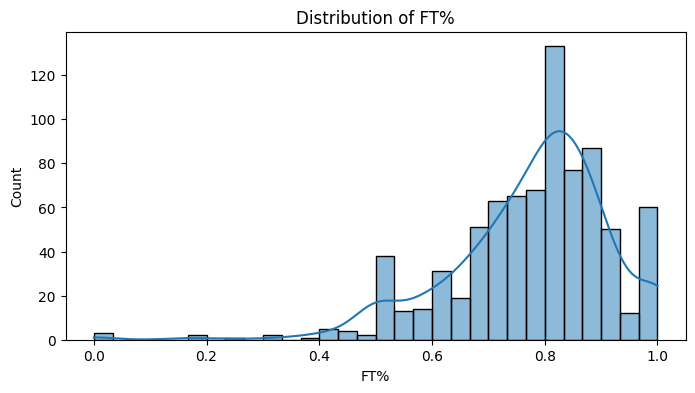

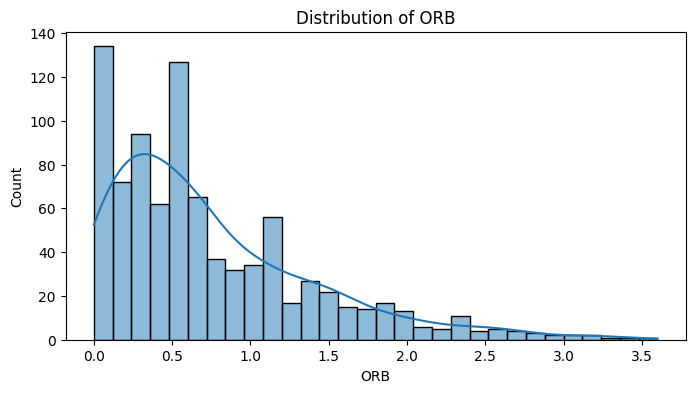

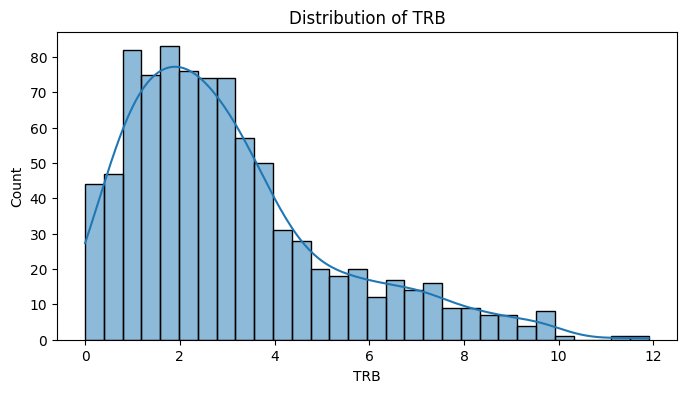

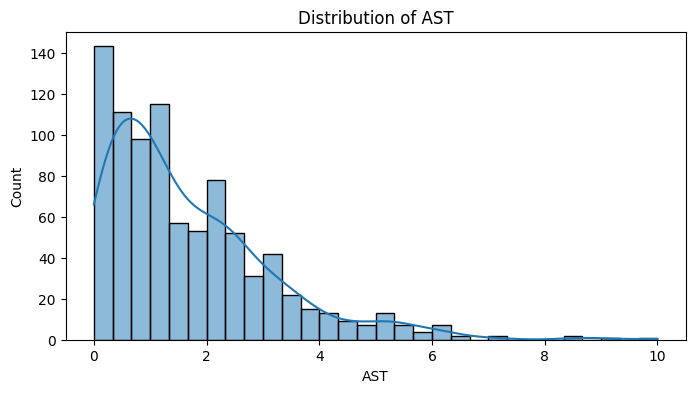

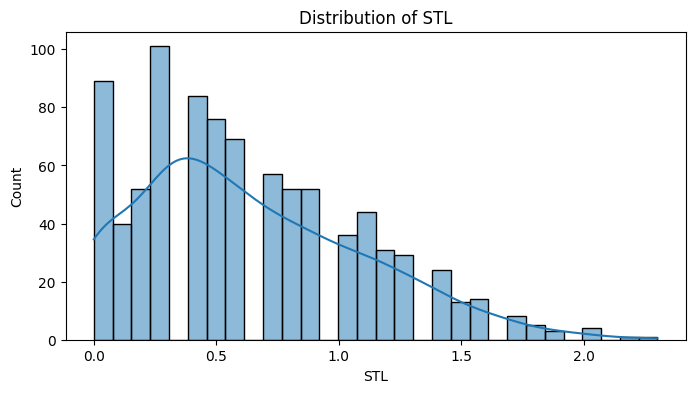

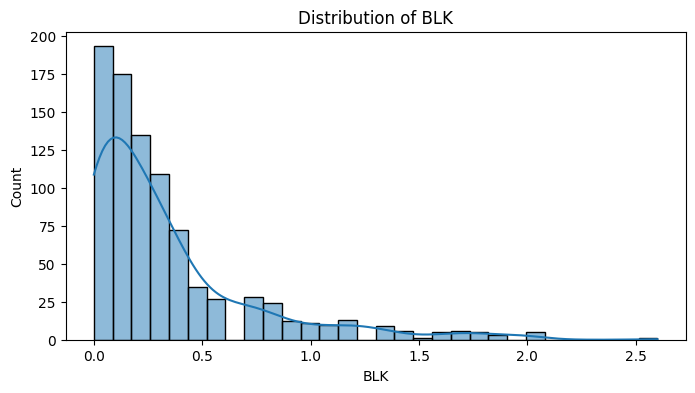

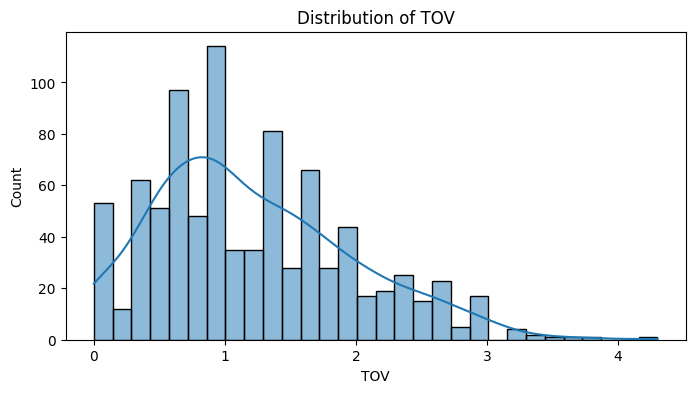

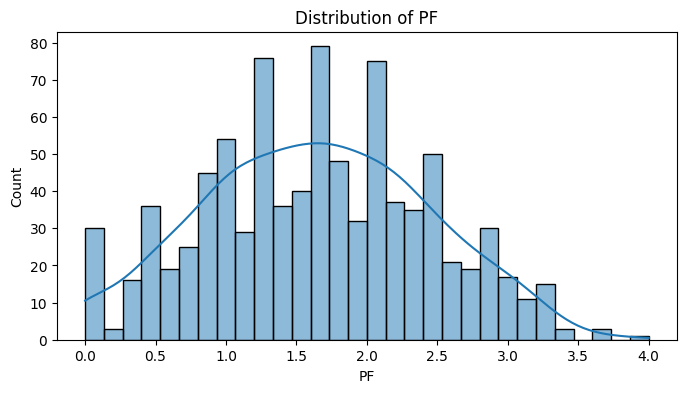

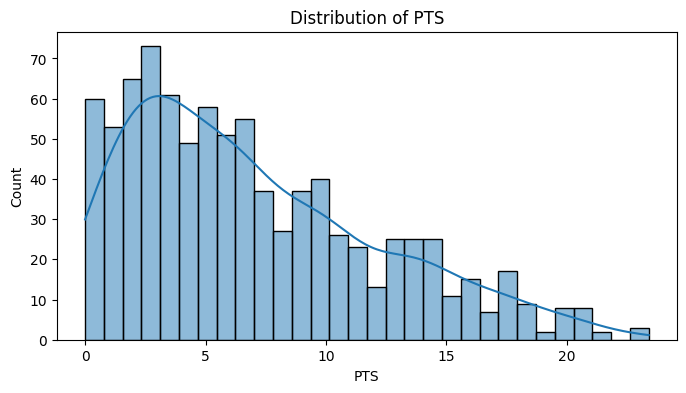

In [ ]:
#EDA on WNBA dataset

# Display basic information about the dataset
print(wnba_data.info())

# Display summary statistics for numerical columns
print(wnba_data.describe())

# Check for missing values
print(wnba_data.isnull().sum())

# Display the first few rows of the dataset
print(wnba_data.head())

# Check the distribution of categorical columns
for col in wnba_data.select_dtypes(include=['object']).columns:
    print(f"\n{col}:\n{wnba_data[col].value_counts()}")

# Visualize the distribution of numerical columns
numerical_columns = wnba_data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(wnba_data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

In [99]:
wnba_data['Team'].unique() #Look at unique teams in the dataset

array(['MIN', 'CHI', 'NYL', 'CON', 'PHO', 'WAS', 'LAS', 'LVA', 'ATL',
       'SEA', 'DAL', 'IND', 'TOT'], dtype=object)

In [100]:
nba_data = pd.read_csv('nba_regular_season.csv', encoding='utf-8', delimiter=";")
nba_data.head() #Importing NBA dataset

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,...,0.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6
1,1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,...,0.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
2,1,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,...,0.643,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6
3,2,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,...,0.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
4,3,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,...,0.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8


In [172]:
#Creation of a table with WNBA teams and their details
# Define the data as a list of lists
wnba_teams = [
    ['Atlanta', 'ATL', 'Atlanta Dream', 'Georgia'],
    ['Chicago', 'CHI', 'Chicago Sky', 'Illinois'],
    ['Connecticut', 'CON', 'Connecticut Sun', 'Connecticut'],
    ['Dallas', 'DAL', 'Dallas Wings', 'Texas'],
    ['Seattle', 'SEA', 'Seattle Storm', 'Washington'],
    ['Indiana', 'IND', 'Indiana Fever', 'Indiana'],
    ['Las Vegas', 'LVA', 'Las Vegas Aces', 'Nevada'],
    ['Los Angeles', 'LAS', 'Los Angeles Sparks', 'California'],
    ['Minnesota', 'MIN', 'Minnesota Lynx', 'Minnesota'],
    ['New York', 'NYL', 'New York Liberty', 'New York'],
    ['Phoenix', 'PHO', 'Phoenix Mercury', 'Arizona'],
    ['Washington', 'WAS', 'Washington Mystics', 'District of Columbia']
]

# Create a Pandas DataFrame
wnba_df = pd.DataFrame(wnba_teams, columns=['City', 'Team', 'Team Name', 'State/Province'])

# Display the table
wnba_df


,City,Team,Team Name,State/Province
0,Atlanta,ATL,Atlanta Dream,Georgia
1,Chicago,CHI,Chicago Sky,Illinois
2,Connecticut,CON,Connecticut Sun,Connecticut
3,Dallas,DAL,Dallas Wings,Texas
4,Seattle,SEA,Seattle Storm,Washington
5,Indiana,IND,Indiana Fever,Indiana
6,Las Vegas,LVA,Las Vegas Aces,Nevada
7,Los Angeles,LAS,Los Angeles Sparks,California
8,Minnesota,MIN,Minnesota Lynx,Minnesota
9,New York,NYL,New York Liberty,New York


In [102]:
wnba_df['Team'] = wnba_df['Team'].str.upper()
wnba_df #Make sure all teams are in uppercase

,City,Team,Team Name,State/Province
0,Atlanta,ATL,Atlanta Dream,Georgia
1,Chicago,CHI,Chicago Sky,Illinois
2,Connecticut,CON,Connecticut Sun,Connecticut
3,Dallas,DAL,Dallas Wings,Texas
4,Seattle,SEA,Seattle Storm,Washington
5,Indiana,IND,Indiana Fever,Indiana
6,Las Vegas,LVA,Las Vegas Aces,Nevada
7,Los Angeles,LAS,Los Angeles Sparks,California
8,Minnesota,MIN,Minnesota Lynx,Minnesota
9,New York,NYL,New York Liberty,New York


In [165]:

# List of top 25 WNBA players from the ESPN 2023 ranking
top_25_players = [
    "Breanna Stewart", "A'ja Wilson", "Alyssa Thomas", "Napheesa Collier", "Satou Sabally",
    "Jewell Loyd", "Brittney Griner", "Kelsey Plum", "Elena Delle Donne", "Chelsea Gray",
    "Kahleah Copper", "Courtney Vandersloot", "Jackie Young", "Ezi Magbegor", "Allisha Gray",
    "Arike Ogunbowale", "Jonquel Jones", "Sabrina Ionescu", "NaLyssa Smith", "DeWanna Bonner",
    "Rhyne Howard", "Shakira Austin", "Aliyah Boston", "Natasha Howard", "Skylar Diggins-Smith"
]

# Add a new column indicating if the player is in the top 25
wnba_data["Top_25_Status"] = wnba_data["Player"].isin(top_25_players)

# Show the result
wnba_data[["Player", "Top_25_Status"]].head(10)


,Player,Top_25_Status
0,Natalie Achonwa,False
1,Julie Allemand,False
2,Lindsay Allen,False
3,Rebecca Allen,False
4,Yvonne Anderson,False
5,Kristine Anigwe,False
6,Ariel Atkins,False
7,Amy Atwell,False
8,Shakira Austin,True
9,Rachel Banham,False


In [103]:
import unicodedata
#Normalize player names to remove accents and special characters
def normalize_name(name):
    return unicodedata.normalize('NFKD', name).encode('ASCII', 'ignore').decode('utf-8')

# Example usage
player_name = "Nikola Jokić"
normalized_name = normalize_name(player_name)
print(normalized_name) 

Nikola Jokic


In [104]:
def clean_name(name):
    return normalize_name(name).strip()

# Testing the function
player_name = " Nikola Jokić "
cleaned_name = clean_name(player_name)
print(cleaned_name) 

Nikola Jokic


In [105]:
# Apply the clean_name function to the 'Player' column
nba_data['Player'] = nba_data['Player'].apply(clean_name)

# Display the cleaned dataset
print(nba_data.head())

   Rk            Player   Pos  Age   Tm   G  GS    MP   FG   FGA  ...    FT%  \
0   1  Precious Achiuwa  PF-C   24  TOT  74  18  21.9  3.2   6.3  ...  0.616   
1   1  Precious Achiuwa     C   24  TOR  25   0  17.5  3.1   6.8  ...  0.571   
2   1  Precious Achiuwa    PF   24  NYK  49  18  24.2  3.2   6.1  ...  0.643   
3   2       Bam Adebayo     C   26  MIA  71  71  34.0  7.5  14.3  ...  0.755   
4   3      Ochai Agbaji    SG   23  TOT  78  28  21.0  2.3   5.6  ...  0.661   

   ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PTS  
0  2.6  4.0   6.6  1.3  0.6  0.9  1.1  1.9   7.6  
1  2.0  3.4   5.4  1.8  0.6  0.5  1.2  1.6   7.7  
2  2.9  4.3   7.2  1.1  0.6  1.1  1.1  2.1   7.6  
3  2.2  8.1  10.4  3.9  1.1  0.9  2.3  2.2  19.3  
4  0.9  1.8   2.8  1.1  0.6  0.6  0.8  1.5   5.8  

[5 rows x 30 columns]


In [106]:
nba_data 

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,...,0.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6
1,1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,...,0.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
2,1,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,...,0.643,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6
3,2,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,...,0.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
4,3,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,...,0.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,568,Thaddeus Young,PF,35,PHO,10,0,8.9,1.1,2.1,...,0.333,1.7,1.1,2.8,0.7,0.5,0.2,0.4,1.1,2.3
731,569,Trae Young,PG,25,ATL,54,54,36.0,8.0,18.7,...,0.855,0.4,2.3,2.8,10.8,1.3,0.2,4.4,2.0,25.7
732,570,Omer Yurtseven,C,25,UTA,48,12,11.4,2.1,3.8,...,0.679,1.5,2.8,4.3,0.6,0.2,0.4,0.8,1.1,4.6
733,571,Cody Zeller,C,31,NOP,43,0,7.4,0.6,1.4,...,0.605,1.1,1.5,2.6,0.9,0.2,0.1,0.4,1.0,1.8


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      735 non-null    int64  
 1   Player  735 non-null    object 
 2   Pos     735 non-null    object 
 3   Age     735 non-null    int64  
 4   Tm      735 non-null    object 
 5   G       735 non-null    int64  
 6   GS      735 non-null    int64  
 7   MP      735 non-null    float64
 8   FG      735 non-null    float64
 9   FGA     735 non-null    float64
 10  FG%     735 non-null    float64
 11  3P      735 non-null    float64
 12  3PA     735 non-null    float64
 13  3P%     735 non-null    float64
 14  2P      735 non-null    float64
 15  2PA     735 non-null    float64
 16  2P%     735 non-null    float64
 17  eFG%    735 non-null    float64
 18  FT      735 non-null    float64
 19  FTA     735 non-null    float64
 20  FT%     735 non-null    float64
 21  ORB     735 non-null

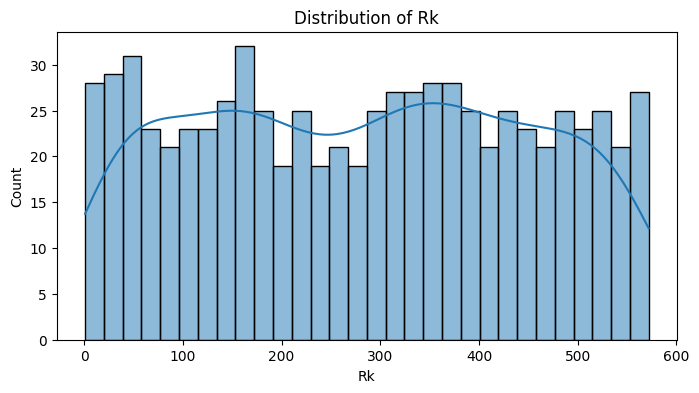

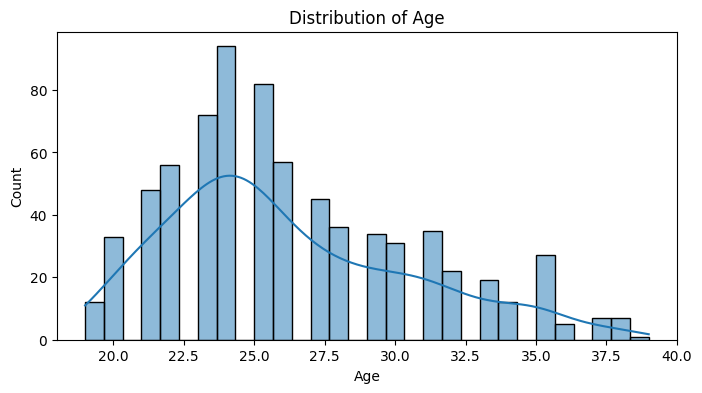

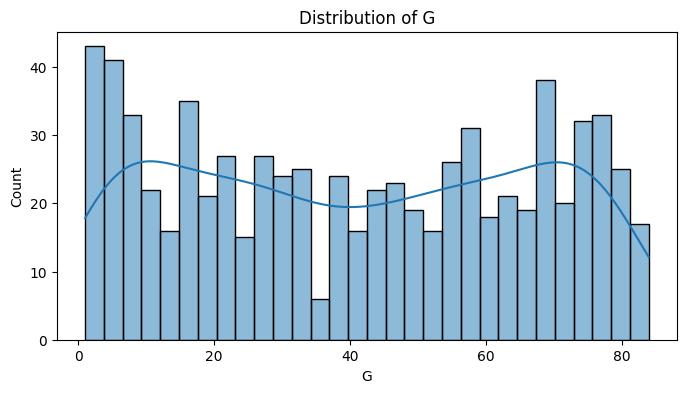

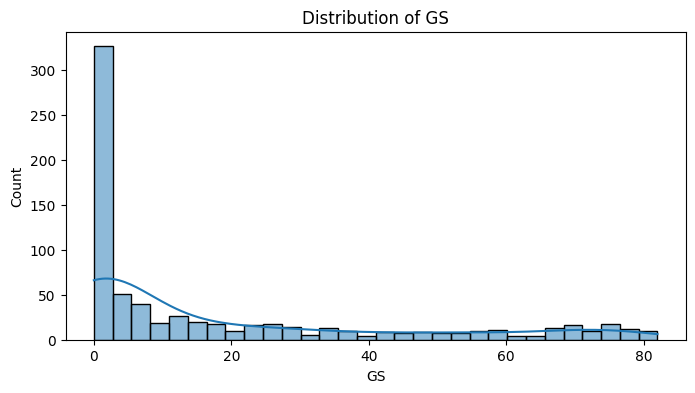

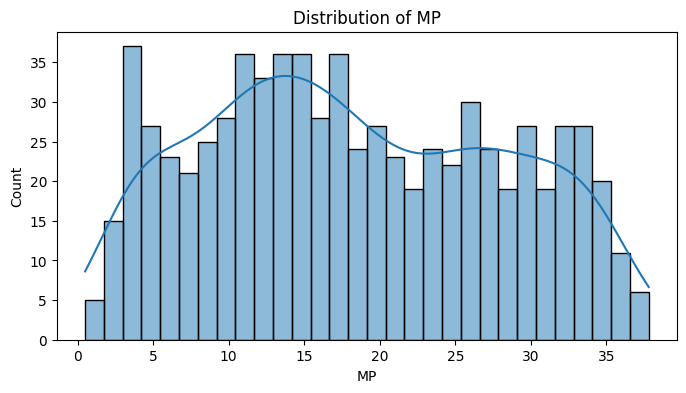

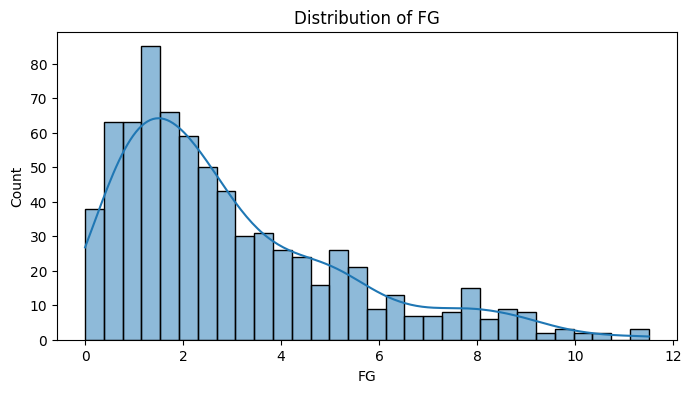

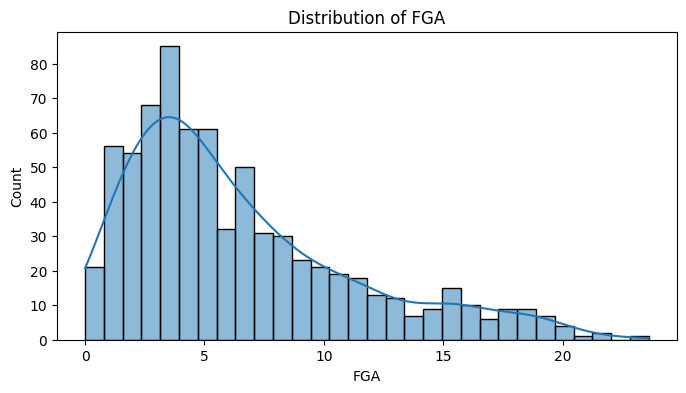

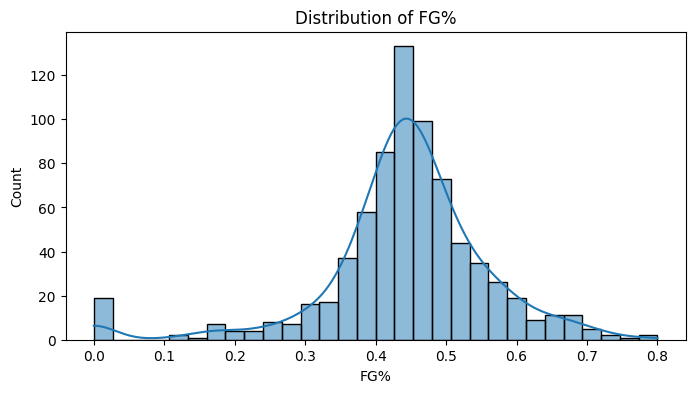

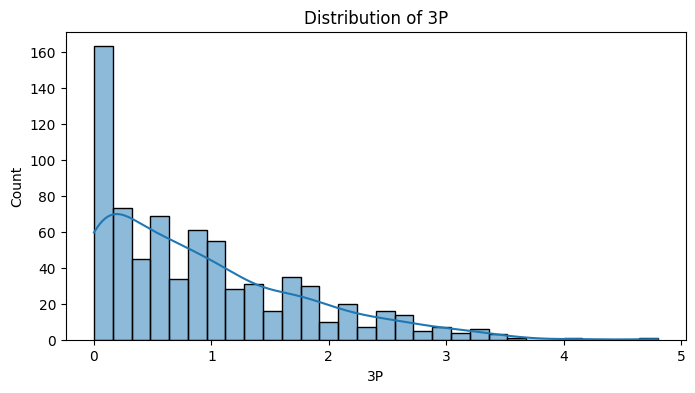

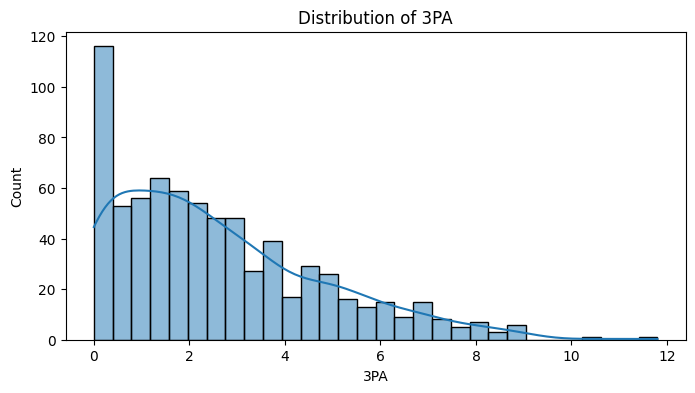

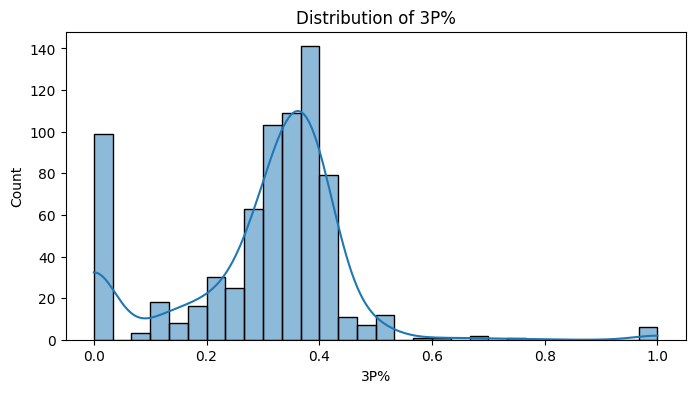

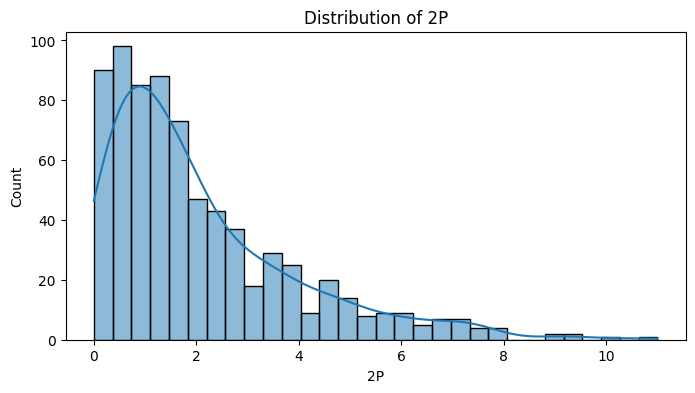

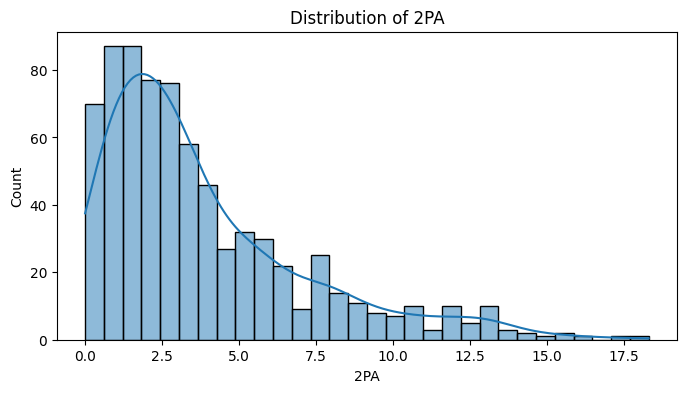

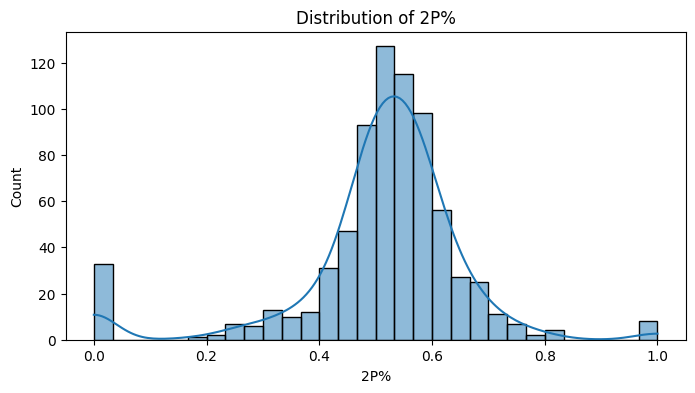

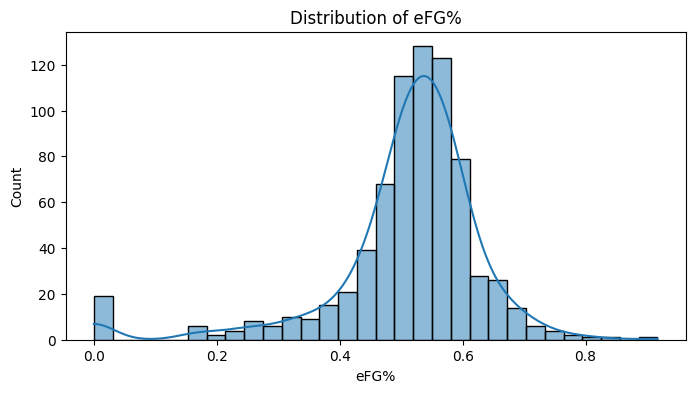

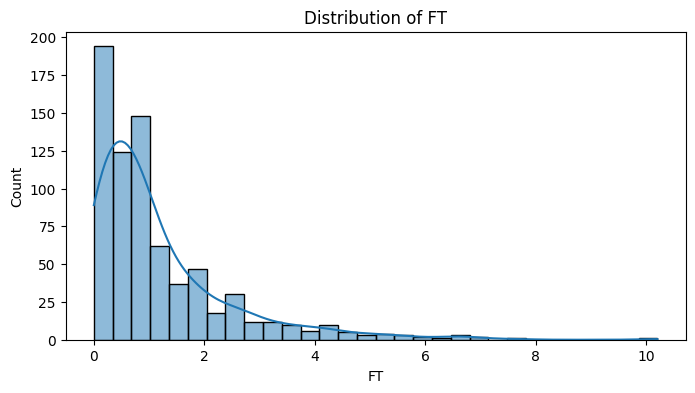

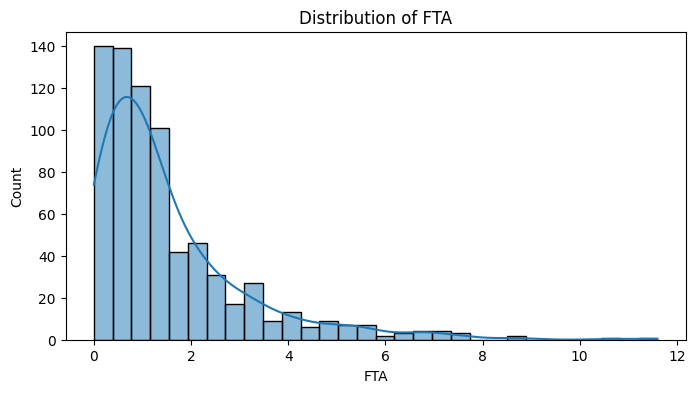

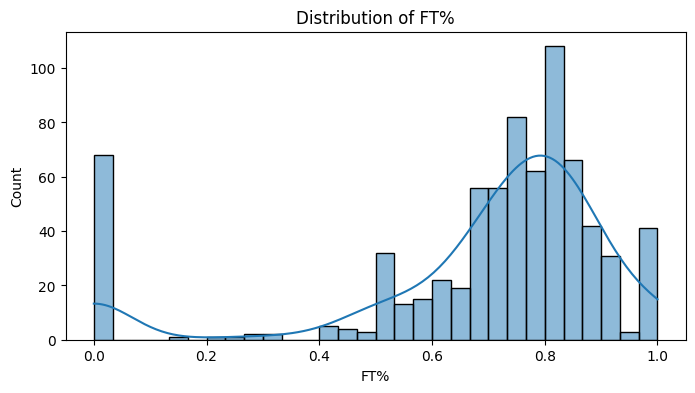

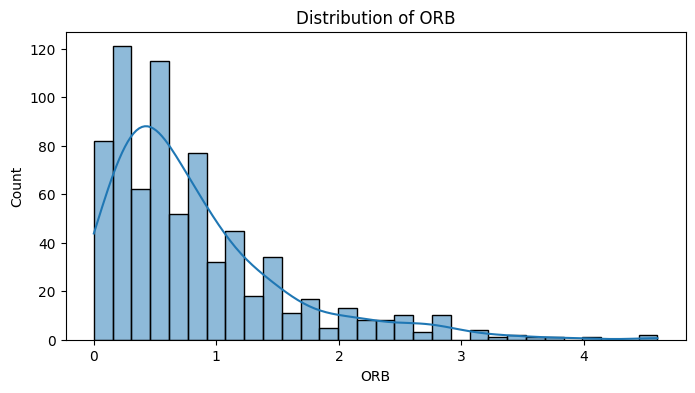

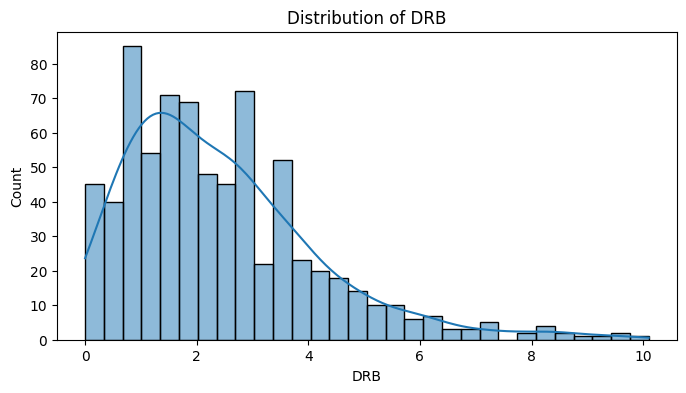

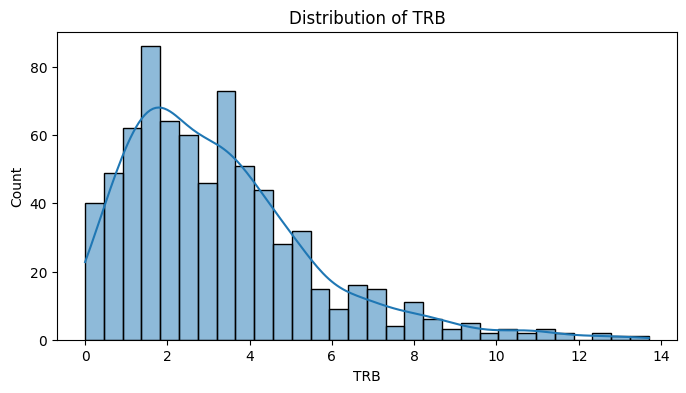

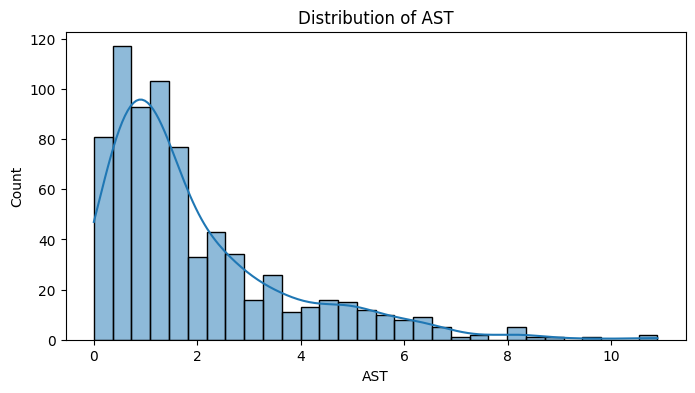

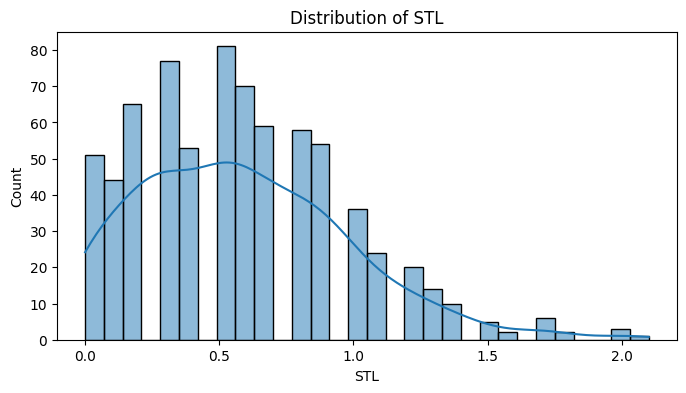

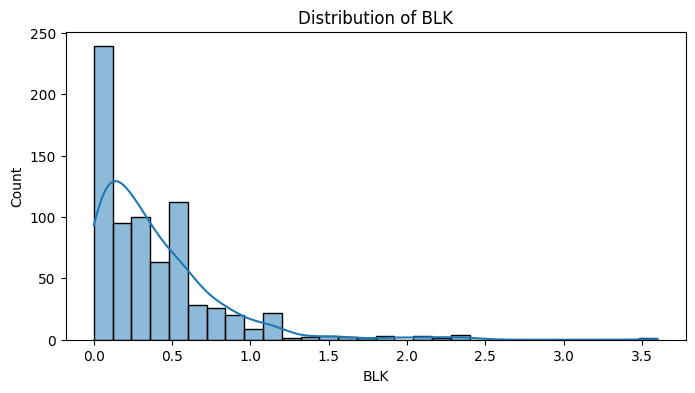

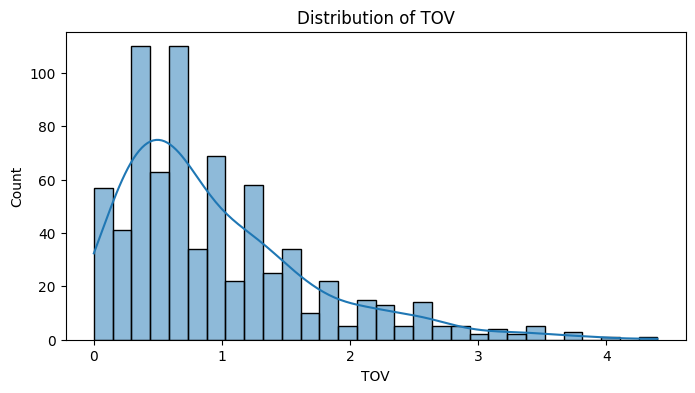

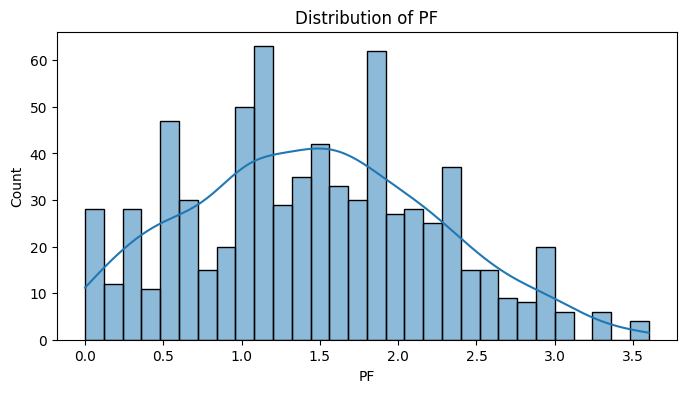

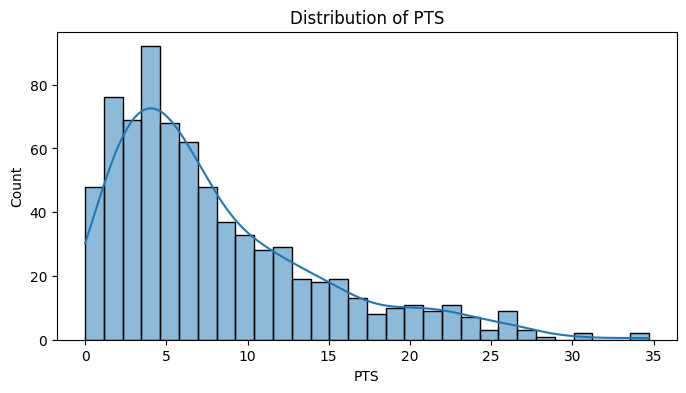

In [ ]:
# Display basic information about the dataset
print(nba_data.info())

# Display summary statistics for numerical columns
print(nba_data.describe())

# Check for missing values
print(nba_data.isnull().sum())

# Display the first few rows of the dataset
print(nba_data.head())

# Check the distribution of categorical columns
for col in nba_data.select_dtypes(include=['object']).columns:
    print(f"\n{col}:\n{nba_data[col].value_counts()}")

numerical_columns = nba_data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(nba_data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()


In [167]:
merged_df = pd.merge(wnba_data, wnba_df , left_on='Team', right_on='Team', how='left')
merged_df


,Player_x,Team,Pos_x,G_x,MP_x,G.1,GS_x,MP.1,FG_x,FGA_x,...,AST_y,STL_y,BLK_y,TOV_y,PF_y,PTS_y,City,State/Province,League,Top_25_player
0,Natalie Achonwa,MIN,F,22,332,22,0,15.1,2.1,4.1,...,1.7,0.4,0.3,1.0,1.6,5.3,Minnesota,Minnesota,WNBA,False
1,Natalie Achonwa,MIN,F,22,332,22,0,15.1,2.1,4.1,...,3.4,0.2,0.0,0.8,1.2,6.7,Minnesota,Minnesota,WNBA,False
2,Natalie Achonwa,MIN,F,22,332,22,0,15.1,2.1,4.1,...,2.3,0.3,0.1,1.3,1.7,7.9,Minnesota,Minnesota,WNBA,False
3,Natalie Achonwa,MIN,F,22,332,22,0,15.1,2.1,4.1,...,1.1,0.4,0.1,0.6,1.6,4.3,Minnesota,Minnesota,WNBA,False
4,Natalie Achonwa,MIN,F,22,332,22,0,15.1,2.1,4.1,...,1.0,0.5,0.3,0.3,2.3,7.3,Minnesota,Minnesota,WNBA,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60744,Mercedes Russell,SEA,C,22,101,22,0,4.6,0.7,1.4,...,0.7,0.1,0.1,0.5,0.4,1.5,Seattle,Washington,WNBA,False
60745,Mercedes Russell,SEA,C,22,101,22,0,4.6,0.7,1.4,...,2.5,1.4,1.4,1.8,2.0,21.8,Seattle,Washington,WNBA,True
60746,Mercedes Russell,SEA,C,22,101,22,0,4.6,0.7,1.4,...,0.5,0.5,0.1,0.5,0.6,2.9,Seattle,Washington,WNBA,False
60747,Mercedes Russell,SEA,C,22,101,22,0,4.6,0.7,1.4,...,0.0,0.0,0.0,0.0,0.0,0.0,Seattle,Washington,WNBA,False


In [166]:
merged_df[merged_df['Player'] == "Kelsey Plum"]

,Player,Team,Pos,G,MP,G.1,GS,MP.1,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,City,Team Name,State/Province
99,Kelsey Plum,LVA,G,36,1182,36,36,32.8,6.8,14.8,...,2.7,5.1,1.0,0.1,2.6,2.5,20.2,Las Vegas,Las Vegas Aces,Nevada
302,Kelsey Plum,LVA,G,34,868,34,30,25.5,3.1,8.6,...,2.9,3.0,0.8,0.1,1.6,2.2,8.6,Las Vegas,Las Vegas Aces,Nevada
466,Kelsey Plum,LVA,G,26,665,26,0,25.6,4.9,11.3,...,2.5,3.6,1.0,0.0,1.7,2.2,14.8,Las Vegas,Las Vegas Aces,Nevada
811,Kelsey Plum,LVA,G,31,790,31,27,25.5,3.4,7.3,...,2.4,4.0,0.8,0.2,1.2,2.1,9.5,Las Vegas,Las Vegas Aces,Nevada


In [168]:
merged_df_dropped = merged_df.rename(columns={'Team_y': 'Team Name'})

In [169]:
import pandas as pd

data = {
    "Team Name": [
        "Atlanta Hawks", "Boston Celtics", "Brooklyn Nets", "Charlotte Hornets", "Chicago Bulls",
        "Cleveland Cavaliers", "Dallas Mavericks", "Denver Nuggets", "Detroit Pistons", "Golden State Warriors",
        "Houston Rockets", "Indiana Pacers", "Los Angeles Clippers", "Los Angeles Lakers", "Memphis Grizzlies",
        "Miami Heat", "Milwaukee Bucks", "Minnesota Timberwolves", "New Orleans Pelicans", "New York Knicks",
        "Oklahoma City Thunder", "Orlando Magic", "Philadelphia 76ers", "Phoenix Suns", "Portland Trail Blazers",
        "Sacramento Kings", "San Antonio Spurs", "Toronto Raptors", "Utah Jazz", "Washington Wizards"
    ],
    "Abbreviation": [
        "ATL", "BOS", "BRK", "CHO", "CHI", "CLE", "DAL", "DEN", "DET", "GSW",
        "HOU", "IND", "LAC", "LAL", "MEM", "MIA", "MIL", "MIN", "NOP", "NYK",
        "OKC", "ORL", "PHI", "PHO", "POR", "SAC", "SAS", "TOR", "UTA", "WAS"
    ],
    "City": [
        "Atlanta", "Boston", "Brooklyn", "Charlotte", "Chicago", "Cleveland", "Dallas", "Denver", "Detroit", "San Francisco",
        "Houston", "Indianapolis", "Los Angeles", "Los Angeles", "Memphis", "Miami", "Milwaukee", "Minneapolis",
        "New Orleans", "New York City", "Oklahoma City", "Orlando", "Philadelphia", "Phoenix", "Portland",
        "Sacramento", "San Antonio", "Toronto", "Salt Lake City", "Washington"
    ],
    "State/Province": [
        "Georgia", "Massachusetts", "New York", "North Carolina", "Illinois", "Ohio", "Texas", "Colorado", "Michigan", "California",
        "Texas", "Indiana", "California", "California", "Tennessee", "Florida", "Wisconsin", "Minnesota",
        "Louisiana", "New York", "Oklahoma", "Florida", "Pennsylvania", "Arizona", "Oregon",
        "California", "Texas", "Ontario", "Utah", "District of Columbia"
    ]
}


# Create the DataFrame
nba_teams_df = pd.DataFrame(data)

# Display the DataFrame
print(nba_teams_df)


                 Team Name Abbreviation            City        State/Province
0            Atlanta Hawks          ATL         Atlanta               Georgia
1           Boston Celtics          BOS          Boston         Massachusetts
2            Brooklyn Nets          BRK        Brooklyn              New York
3        Charlotte Hornets          CHO       Charlotte        North Carolina
4            Chicago Bulls          CHI         Chicago              Illinois
5      Cleveland Cavaliers          CLE       Cleveland                  Ohio
6         Dallas Mavericks          DAL          Dallas                 Texas
7           Denver Nuggets          DEN          Denver              Colorado
8          Detroit Pistons          DET         Detroit              Michigan
9    Golden State Warriors          GSW   San Francisco            California
10         Houston Rockets          HOU         Houston                 Texas
11          Indiana Pacers          IND    Indianapolis         

In [170]:
nba_merge = pd.merge(nba_data, nba_teams_df, left_on='Tm', right_on='Abbreviation', how='left')
nba_merge.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,AST,STL,BLK,TOV,PF,PTS,Team Name,Abbreviation,City,State/Province
0,1,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,...,1.3,0.6,0.9,1.1,1.9,7.6,NaN,NaN,NaN,NaN
1,1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,...,1.8,0.6,0.5,1.2,1.6,7.7,Toronto Raptors,TOR,Toronto,Ontario
2,1,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,...,1.1,0.6,1.1,1.1,2.1,7.6,New York Knicks,NYK,New York City,New York
3,2,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,...,3.9,1.1,0.9,2.3,2.2,19.3,Miami Heat,MIA,Miami,Florida
4,3,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,...,1.1,0.6,0.6,0.8,1.5,5.8,NaN,NaN,NaN,NaN


In [113]:
nba_merged_dropped = nba_merge.drop(columns=['Abbreviation','Rk', 'Age','eFG%','DRB'])
nba_merged_dropped.head()

,Player,Pos,Tm,G,GS,MP,FG,FGA,FG%,3P,...,TRB,AST,STL,BLK,TOV,PF,PTS,Team Name,City,State/Province
0,Precious Achiuwa,PF-C,TOT,74,18,21.9,3.2,6.3,0.501,0.4,...,6.6,1.3,0.6,0.9,1.1,1.9,7.6,NaN,NaN,NaN
1,Precious Achiuwa,C,TOR,25,0,17.5,3.1,6.8,0.459,0.5,...,5.4,1.8,0.6,0.5,1.2,1.6,7.7,Toronto Raptors,Toronto,Ontario
2,Precious Achiuwa,PF,NYK,49,18,24.2,3.2,6.1,0.525,0.3,...,7.2,1.1,0.6,1.1,1.1,2.1,7.6,New York Knicks,New York City,New York
3,Bam Adebayo,C,MIA,71,71,34.0,7.5,14.3,0.521,0.2,...,10.4,3.9,1.1,0.9,2.3,2.2,19.3,Miami Heat,Miami,Florida
4,Ochai Agbaji,SG,TOT,78,28,21.0,2.3,5.6,0.411,0.8,...,2.8,1.1,0.6,0.6,0.8,1.5,5.8,NaN,NaN,NaN


In [171]:
print(merged_df.shape)
print(nba_merged_dropped.shape)

(60749, 58)
(735, 31)


In [115]:
print(merged_df_dropped.head())
print(nba_merged_dropped.head())

            Player Team Pos   G   MP  G.1  GS  MP.1   FG  FGA  ...  TRB  AST  \
0  Natalie Achonwa  MIN   F  22  332   22   0  15.1  2.1  4.1  ...  4.1  1.7   
1   Julie Allemand  CHI   G  25  402   25   4  16.1  1.0  2.4  ...  1.6  3.4   
2    Lindsay Allen  MIN   G   9  134    9   0  14.9  2.2  4.2  ...  1.6  3.4   
3    Rebecca Allen  NYL   G  25  523   25  19  20.9  2.6  6.8  ...  3.4  1.2   
4  Yvonne Anderson  CON   G  11  101   11   0   9.2  1.1  2.4  ...  0.8  1.1   

   STL  BLK  TOV   PF  PTS         City         Team Name  State/Province  
0  0.4  0.3  1.0  1.6  5.3    Minnesota    Minnesota Lynx       Minnesota  
1  0.6  0.1  1.3  0.9  3.0      Chicago       Chicago Sky        Illinois  
2  0.2  0.0  0.8  1.2  6.7    Minnesota    Minnesota Lynx       Minnesota  
3  0.8  1.0  1.0  1.9  7.0     New York  New York Liberty        New York  
4  0.3  0.2  1.0  1.3  3.2  Connecticut   Connecticut Sun     Connecticut  

[5 rows x 31 columns]
             Player   Pos   Tm   G  GS  

In [116]:
merged_df_dropped.columns.to_list()

['Player',
 'Team',
 'Pos',
 'G',
 'MP',
 'G.1',
 'GS',
 'MP.1',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'City',
 'Team Name',
 'State/Province']

In [117]:
nba_merged_dropped = nba_merged_dropped.rename(columns={'Tm': 'Team',})
nba_merged_dropped.head()

merged_df.head()

# merged_df_dropped = merged_df.drop(columns=['Abbreviation','Team_y', 'G.1','MP.1'])
# merged_df_dropped.head()

merged_df_dropped = merged_df_dropped.rename(columns={'Team_x': 'Team','Team_Start': 'Team Name' })
merged_df_dropped.head()

display(merged_df_dropped)

combined_df = pd.concat([merged_df_dropped, nba_merged_dropped], axis=0)
combined_df.head()

,Player,Team,Pos,G,MP,G.1,GS,MP.1,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,City,Team Name,State/Province
0,Natalie Achonwa,MIN,F,22,332,22,0,15.1,2.1,4.1,...,4.1,1.7,0.4,0.3,1.0,1.6,5.3,Minnesota,Minnesota Lynx,Minnesota
1,Julie Allemand,CHI,G,25,402,25,4,16.1,1.0,2.4,...,1.6,3.4,0.6,0.1,1.3,0.9,3.0,Chicago,Chicago Sky,Illinois
2,Lindsay Allen,MIN,G,9,134,9,0,14.9,2.2,4.2,...,1.6,3.4,0.2,0.0,0.8,1.2,6.7,Minnesota,Minnesota Lynx,Minnesota
3,Rebecca Allen,NYL,G,25,523,25,19,20.9,2.6,6.8,...,3.4,1.2,0.8,1.0,1.0,1.9,7.0,New York,New York Liberty,New York
4,Yvonne Anderson,CON,G,11,101,11,0,9.2,1.1,2.4,...,0.8,1.1,0.3,0.2,1.0,1.3,3.2,Connecticut,Connecticut Sun,Connecticut
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,Maggie Lucas,DAL,G,1,20,1,0,20.0,0.0,5.0,...,0.0,0.0,2.0,0.0,1.0,0.0,0.0,Dallas,Dallas Wings,Texas
881,Teana Muldrow,DAL,F,1,3,1,0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Dallas,Dallas Wings,Texas
882,Cappie Pondexter,IND,G,17,411,17,14,24.2,4.1,10.6,...,2.4,2.6,0.7,0.0,1.4,1.8,10.2,Indiana,Indiana Fever,Indiana
883,Aerial Powers,WAS,F-G,9,114,9,0,12.7,2.0,4.4,...,3.2,0.9,0.7,0.4,0.8,1.0,6.1,Washington,Washington Mystics,District of Columbia


,Player,Team,Pos,G,MP,G.1,GS,MP.1,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,City,Team Name,State/Province
0,Natalie Achonwa,MIN,F,22,332.0,22.0,0,15.1,2.1,4.1,...,4.1,1.7,0.4,0.3,1.0,1.6,5.3,Minnesota,Minnesota Lynx,Minnesota
1,Julie Allemand,CHI,G,25,402.0,25.0,4,16.1,1.0,2.4,...,1.6,3.4,0.6,0.1,1.3,0.9,3.0,Chicago,Chicago Sky,Illinois
2,Lindsay Allen,MIN,G,9,134.0,9.0,0,14.9,2.2,4.2,...,1.6,3.4,0.2,0.0,0.8,1.2,6.7,Minnesota,Minnesota Lynx,Minnesota
3,Rebecca Allen,NYL,G,25,523.0,25.0,19,20.9,2.6,6.8,...,3.4,1.2,0.8,1.0,1.0,1.9,7.0,New York,New York Liberty,New York
4,Yvonne Anderson,CON,G,11,101.0,11.0,0,9.2,1.1,2.4,...,0.8,1.1,0.3,0.2,1.0,1.3,3.2,Connecticut,Connecticut Sun,Connecticut


In [118]:
#Printing columns
print(merged_df_dropped.columns)
print(nba_merged_dropped.columns)

Index(['Player', 'Team', 'Pos', 'G', 'MP', 'G.1', 'GS', 'MP.1', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%',
       'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'City',
       'Team Name', 'State/Province'],
      dtype='object')
Index(['Player', 'Pos', 'Team', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Team Name', 'City',
       'State/Province'],
      dtype='object')


In [119]:
# Arranging the columns to be in the same order
common_columns = [
    "Player", "Pos", "Team", "G", "GS", "MP", "FG", "FGA", "FG%", "3P", "3PA", "3P%", 
    "2P", "2PA", "2P%", "FT", "FTA", "FT%", "ORB", "TRB", "AST", "STL", "BLK", 
    "TOV", "PF", "PTS", "City", "State/Province", "League",'Top_25_player'
]


In [120]:
#Creating a label for WNBA and NBA players
nba_merged_dropped["League"] = "NBA"
merged_df_dropped["League"] = "WNBA"

In [121]:
#Creating a label for top 25 players
top_25_players = [
    "Breanna Stewart", "A'ja Wilson", "Alyssa Thomas", "Napheesa Collier", "Satou Sabally",
    "Jewell Loyd", "Brittney Griner", "Kelsey Plum", "Elena Delle Donne", "Chelsea Gray",
    "Kahleah Copper", "Courtney Vandersloot", "Jackie Young", "Ezi Magbegor", "Allisha Gray",
    "Arike Ogunbowale", "Jonquel Jones", "Sabrina Ionescu", "NaLyssa Smith", "DeWanna Bonner",
    "Rhyne Howard", "Shakira Austin", "Aliyah Boston", "Natasha Howard", "Skylar Diggins-Smith"
]

In [122]:
nba_merged_dropped['Top_25_player'] = nba_merged_dropped['Player'].isin(top_25_players)

In [123]:
merged_df_dropped['Top_25_player'] = merged_df_dropped['Player'].isin(top_25_players)

In [124]:
merged_df_dropped

,Player,Team,Pos,G,MP,G.1,GS,MP.1,FG,FGA,...,STL,BLK,TOV,PF,PTS,City,Team Name,State/Province,League,Top_25_player
0,Natalie Achonwa,MIN,F,22,332,22,0,15.1,2.1,4.1,...,0.4,0.3,1.0,1.6,5.3,Minnesota,Minnesota Lynx,Minnesota,WNBA,False
1,Julie Allemand,CHI,G,25,402,25,4,16.1,1.0,2.4,...,0.6,0.1,1.3,0.9,3.0,Chicago,Chicago Sky,Illinois,WNBA,False
2,Lindsay Allen,MIN,G,9,134,9,0,14.9,2.2,4.2,...,0.2,0.0,0.8,1.2,6.7,Minnesota,Minnesota Lynx,Minnesota,WNBA,False
3,Rebecca Allen,NYL,G,25,523,25,19,20.9,2.6,6.8,...,0.8,1.0,1.0,1.9,7.0,New York,New York Liberty,New York,WNBA,False
4,Yvonne Anderson,CON,G,11,101,11,0,9.2,1.1,2.4,...,0.3,0.2,1.0,1.3,3.2,Connecticut,Connecticut Sun,Connecticut,WNBA,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,Maggie Lucas,DAL,G,1,20,1,0,20.0,0.0,5.0,...,2.0,0.0,1.0,0.0,0.0,Dallas,Dallas Wings,Texas,WNBA,False
881,Teana Muldrow,DAL,F,1,3,1,0,3.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,Dallas,Dallas Wings,Texas,WNBA,False
882,Cappie Pondexter,IND,G,17,411,17,14,24.2,4.1,10.6,...,0.7,0.0,1.4,1.8,10.2,Indiana,Indiana Fever,Indiana,WNBA,False
883,Aerial Powers,WAS,F-G,9,114,9,0,12.7,2.0,4.4,...,0.7,0.4,0.8,1.0,6.1,Washington,Washington Mystics,District of Columbia,WNBA,False


In [125]:
nba_merged_dropped.head()

,Player,Pos,Team,G,GS,MP,FG,FGA,FG%,3P,...,STL,BLK,TOV,PF,PTS,Team Name,City,State/Province,League,Top_25_player
0,Precious Achiuwa,PF-C,TOT,74,18,21.9,3.2,6.3,0.501,0.4,...,0.6,0.9,1.1,1.9,7.6,NaN,NaN,NaN,NBA,False
1,Precious Achiuwa,C,TOR,25,0,17.5,3.1,6.8,0.459,0.5,...,0.6,0.5,1.2,1.6,7.7,Toronto Raptors,Toronto,Ontario,NBA,False
2,Precious Achiuwa,PF,NYK,49,18,24.2,3.2,6.1,0.525,0.3,...,0.6,1.1,1.1,2.1,7.6,New York Knicks,New York City,New York,NBA,False
3,Bam Adebayo,C,MIA,71,71,34.0,7.5,14.3,0.521,0.2,...,1.1,0.9,2.3,2.2,19.3,Miami Heat,Miami,Florida,NBA,False
4,Ochai Agbaji,SG,TOT,78,28,21.0,2.3,5.6,0.411,0.8,...,0.6,0.6,0.8,1.5,5.8,NaN,NaN,NaN,NBA,False


In [126]:

# Reorder columns for consistency
nba_df = nba_merged_dropped[common_columns]
wnba_df = merged_df_dropped[common_columns]

# Define position mapping
position_mapping = {
    'PG': 'G',
    'SG': 'G',
    'PG-SG': 'G',
    'SG-PG': 'G',
    'SF': 'F',
    'SF-PF': 'F',
    'PF-SF': 'F',
    'PF': 'F',
    'C': 'C',
    'F': 'F',
    'F-C': 'F-C',
    'C-PF': 'F-C',
    'PF-C': 'F-C',
    'G': 'G',
    'G-F': 'G-F',
    'C-F': 'F-C',
}

# Apply the mapping
nba_merged_dropped['Pos'] = nba_merged_dropped['Pos'].map(position_mapping).fillna(nba_merged_dropped['Pos'])
merged_df_dropped['Pos'] = merged_df_dropped['Pos'].map(position_mapping).fillna(merged_df_dropped['Pos'])

# Verify the changes
print(nba_merged_dropped['Pos'].unique())
print(merged_df_dropped['Pos'].unique())


numerical_columns = combined_df.select_dtypes(include=[np.number]).columns.tolist()

numerical_columns

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler



merged_df_dropped.head()

['F-C' 'C' 'F' 'G' 'SF-SG']
['F' 'G' 'F-C' 'F-G' 'G-F' 'C']


,Player,Team,Pos,G,MP,G.1,GS,MP.1,FG,FGA,...,STL,BLK,TOV,PF,PTS,City,Team Name,State/Province,League,Top_25_player
0,Natalie Achonwa,MIN,F,22,332,22,0,15.1,2.1,4.1,...,0.4,0.3,1.0,1.6,5.3,Minnesota,Minnesota Lynx,Minnesota,WNBA,False
1,Julie Allemand,CHI,G,25,402,25,4,16.1,1.0,2.4,...,0.6,0.1,1.3,0.9,3.0,Chicago,Chicago Sky,Illinois,WNBA,False
2,Lindsay Allen,MIN,G,9,134,9,0,14.9,2.2,4.2,...,0.2,0.0,0.8,1.2,6.7,Minnesota,Minnesota Lynx,Minnesota,WNBA,False
3,Rebecca Allen,NYL,G,25,523,25,19,20.9,2.6,6.8,...,0.8,1.0,1.0,1.9,7.0,New York,New York Liberty,New York,WNBA,False
4,Yvonne Anderson,CON,G,11,101,11,0,9.2,1.1,2.4,...,0.3,0.2,1.0,1.3,3.2,Connecticut,Connecticut Sun,Connecticut,WNBA,False


In [127]:
merged_df_dropped

,Player,Team,Pos,G,MP,G.1,GS,MP.1,FG,FGA,...,STL,BLK,TOV,PF,PTS,City,Team Name,State/Province,League,Top_25_player
0,Natalie Achonwa,MIN,F,22,332,22,0,15.1,2.1,4.1,...,0.4,0.3,1.0,1.6,5.3,Minnesota,Minnesota Lynx,Minnesota,WNBA,False
1,Julie Allemand,CHI,G,25,402,25,4,16.1,1.0,2.4,...,0.6,0.1,1.3,0.9,3.0,Chicago,Chicago Sky,Illinois,WNBA,False
2,Lindsay Allen,MIN,G,9,134,9,0,14.9,2.2,4.2,...,0.2,0.0,0.8,1.2,6.7,Minnesota,Minnesota Lynx,Minnesota,WNBA,False
3,Rebecca Allen,NYL,G,25,523,25,19,20.9,2.6,6.8,...,0.8,1.0,1.0,1.9,7.0,New York,New York Liberty,New York,WNBA,False
4,Yvonne Anderson,CON,G,11,101,11,0,9.2,1.1,2.4,...,0.3,0.2,1.0,1.3,3.2,Connecticut,Connecticut Sun,Connecticut,WNBA,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,Maggie Lucas,DAL,G,1,20,1,0,20.0,0.0,5.0,...,2.0,0.0,1.0,0.0,0.0,Dallas,Dallas Wings,Texas,WNBA,False
881,Teana Muldrow,DAL,F,1,3,1,0,3.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,Dallas,Dallas Wings,Texas,WNBA,False
882,Cappie Pondexter,IND,G,17,411,17,14,24.2,4.1,10.6,...,0.7,0.0,1.4,1.8,10.2,Indiana,Indiana Fever,Indiana,WNBA,False
883,Aerial Powers,WAS,F-G,9,114,9,0,12.7,2.0,4.4,...,0.7,0.4,0.8,1.0,6.1,Washington,Washington Mystics,District of Columbia,WNBA,False


In [128]:
combined_data = pd.concat([nba_merged_dropped, merged_df_dropped], axis=0)

combined_data

numerical_columns = combined_data.select_dtypes(include=[np.number]).columns.tolist()

In [129]:
from sklearn.preprocessing import StandardScaler

numerical_columns = combined_data.select_dtypes(include=['float64', 'int64']).columns.tolist()


numerical_columns = [col for col in numerical_columns if col not in ['Player', 'League']]

#Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical data (scale only the numerical columns)
scaled_numerical_data = scaler.fit_transform(combined_data[numerical_columns])

# Convert the scaled data back to a DataFrame
scaled_numerical_df = pd.DataFrame(scaled_numerical_data, columns=numerical_columns)

# Reintegrate with non-numerical columns (e.g., 'Player', 'League')
scaled_combined_data = combined_data.copy()
scaled_combined_data[numerical_columns] = scaled_numerical_df


print(scaled_combined_data.head())

             Player  Pos Team         G        GS        MP        FG  \
0  Precious Achiuwa  F-C  TOT  2.050987  0.187681 -0.706175  0.212401   
1  Precious Achiuwa    C  TOR -0.252130 -0.732578 -0.719729  0.165599   
2  Precious Achiuwa    F  NYK  0.875927  0.187681 -0.699090  0.212401   
3       Bam Adebayo    C  MIA  1.909980  2.897332 -0.668903  2.224894   
4      Ochai Agbaji    G  TOT  2.238996  0.698936 -0.708947 -0.208819   

        FGA       FG%        3P  ...       TOV        PF       PTS  \
0  0.031957  0.636249 -0.459426  ...  0.013462  0.434236  0.026157   
1  0.145688  0.290036 -0.328023  ...  0.143276  0.057381  0.043284   
2 -0.013535  0.834085 -0.590830  ...  0.013462  0.685472  0.026157   
3  1.851658  0.801112 -0.722234  ...  1.571233  0.811091  2.030085   
4 -0.127267 -0.105635  0.066189  ... -0.375980 -0.068237 -0.282140   

         Team Name           City  State/Province  League  Top_25_player  G.1  \
0              NaN            NaN             NaN     NBA  

In [130]:

import pandas as pd

categorical_columns =['Pos', 'Team', 'Team Name', 'City', 'League']

# One-hot encode for both datasets
combined_data_encoded = pd.get_dummies(scaled_combined_data, columns=categorical_columns)




categorical_columns

combined_data_encoded.head()

,Player,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,City_Portland,City_Sacramento,City_Salt Lake City,City_San Antonio,City_San Francisco,City_Seattle,City_Toronto,City_Washington,League_NBA,League_WNBA
0,Precious Achiuwa,2.050987,0.187681,-0.706175,0.212401,0.031957,0.636249,-0.459426,-0.442269,-0.186194,...,False,False,False,False,False,False,False,False,True,False
1,Precious Achiuwa,-0.252130,-0.732578,-0.719729,0.165599,0.145688,0.290036,-0.328023,-0.137731,-0.128335,...,False,False,False,False,False,False,True,False,True,False
2,Precious Achiuwa,0.875927,0.187681,-0.699090,0.212401,-0.013535,0.834085,-0.590830,-0.594538,-0.237624,...,False,False,False,False,False,False,False,False,True,False
3,Bam Adebayo,1.909980,2.897332,-0.668903,2.224894,1.851658,0.801112,-0.722234,-0.797563,0.385969,...,False,False,False,False,False,False,False,False,True,False
4,Ochai Agbaji,2.238996,0.698936,-0.708947,-0.208819,-0.127267,-0.105635,0.066189,0.268319,-0.019045,...,False,False,False,False,False,False,False,False,True,False


In [131]:
# Ensure unique player names
combined_data_encoded = combined_data_encoded.drop_duplicates(subset='Player')


In [132]:
combined_data_encoded[numerical_columns] = combined_data_encoded[numerical_columns].fillna(0)


In [133]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute similarity across all players (NBA + WNBA)
similarity_matrix = cosine_similarity(combined_data_encoded[numerical_columns])

# Convert to DataFrame with Player names as index & columns
similarity_df = pd.DataFrame(similarity_matrix, index=combined_data_encoded['Player'], columns=combined_data_encoded['Player'])

print("Similarity Matrix Shape:", similarity_df.shape)


# Separate NBA and WNBA players
nba_players = combined_data_encoded[combined_data_encoded["League_NBA"] == 1]["Player"]
wnba_players = combined_data_encoded[combined_data_encoded["League_WNBA"] == 1]["Player"]

# Ensure that the player names in nba_players and wnba_players match the index/columns in similarity_df
# Extract NBA → WNBA similarities from the similarity matrix
nba_to_wnba_similarity = similarity_df.loc[nba_players, wnba_players]

# Output the shape of the NBA-to-WNBA similarity matrix
print("NBA-to-WNBA Similarity Matrix Shape:", nba_to_wnba_similarity.shape)

Similarity Matrix Shape: (863, 863)
NBA-to-WNBA Similarity Matrix Shape: (572, 291)


In [134]:
def recommend_wnba_players(nba_player, top_n=5, match_position=True):
    if nba_player not in nba_to_wnba_similarity.index:
        return "Player not found in dataset."

    # Get similarity scores
    similar_wnba_players = nba_to_wnba_similarity.loc[nba_player].sort_values(ascending=False)

    # Only filter by position if enabled
    if match_position:
        # Identify position columns
        position_columns = [col for col in combined_data_encoded.columns if col.startswith("Pos_")]

        # Get NBA player's position(s) (which one-hot position columns contain 1)
        nba_positions = combined_data_encoded.loc[combined_data_encoded["Player"] == nba_player, position_columns]
        matching_positions = nba_positions.loc[:, (nba_positions == 1).any()].columns.tolist()

        # Filter WNBA players who have at least one of the same positions
        if matching_positions:
            # Get WNBA players' positions (subset only WNBA players from combined dataset)
            wnba_players_data = combined_data_encoded[combined_data_encoded["League_WNBA"] == 1]
            
            # Ensure we only filter WNBA players who exist in `similar_wnba_players`
            wnba_players_data = wnba_players_data.set_index("Player").loc[similar_wnba_players.index]

            # Create a boolean mask for players with matching positions
            position_mask = wnba_players_data[matching_positions].sum(axis=1) > 0

            # Apply the mask to the similarity scores
            similar_wnba_players = similar_wnba_players.loc[position_mask]

    return similar_wnba_players.head(top_n)

# Example: Recommend WNBA players for Jayson Tatum
print(recommend_wnba_players("Stephen Curry"))


Player
Crystal Dangerfield    1.000000
Arike Ogunbowale       0.941901
Sydney Colson          0.934089
Jewell Loyd            0.928243
Crystal Bradford       0.915124
Name: Stephen Curry, dtype: float64


#Prioritize players from the same city

In [135]:
def recommend_wnba_players(nba_player, top_n=5, match_position=True, match_city=True):
    if nba_player not in nba_to_wnba_similarity.index:
        return "Player not found in dataset."

    # Get similarity scores
    similar_wnba_players = nba_to_wnba_similarity.loc[nba_player].sort_values(ascending=False)

    # Only filter by position if enabled
    if match_position:
        # Identify position columns
        position_columns = [col for col in combined_data_encoded.columns if col.startswith("Pos_")]

        # Get NBA player's position(s) (which one-hot position columns contain 1)
        nba_positions = combined_data_encoded.loc[combined_data_encoded["Player"] == nba_player, position_columns]
        matching_positions = nba_positions.loc[:, (nba_positions == 1).any()].columns.tolist()

        # Filter WNBA players who have at least one of the same positions
        if matching_positions:
            # Get WNBA players' positions (subset only WNBA players from combined dataset)
            wnba_players_data = combined_data_encoded[combined_data_encoded["League_WNBA"] == 1]
            
            # Ensure we only filter WNBA players who exist in `similar_wnba_players`
            wnba_players_data = wnba_players_data.set_index("Player").loc[similar_wnba_players.index]

            # Create a boolean mask for players with matching positions
            position_mask = wnba_players_data[matching_positions].sum(axis=1) > 0

            # Apply the mask to the similarity scores
            similar_wnba_players = similar_wnba_players.loc[position_mask]

    # Only filter by city if enabled
    if match_city:
        # Identify city columns
        city_columns = [col for col in combined_data_encoded.columns if col.startswith("City_")]

        # Get NBA player's city (which one-hot city column contains 1)
        nba_city = combined_data_encoded.loc[combined_data_encoded["Player"] == nba_player, city_columns]
        matching_city = nba_city.loc[:, (nba_city == 1).any()].columns.tolist()

        # Filter WNBA players who are from the same city
        if matching_city:
            # Get WNBA players' cities (subset only WNBA players from combined dataset)
            wnba_players_data = combined_data_encoded[combined_data_encoded["League_WNBA"] == 1]
            
            # Ensure we only filter WNBA players who exist in `similar_wnba_players`
            wnba_players_data = wnba_players_data.set_index("Player").loc[similar_wnba_players.index]

            # Create a boolean mask for players with matching cities
            city_mask = wnba_players_data[matching_city].sum(axis=1) > 0

            # Apply the mask to the similarity scores
            similar_wnba_players = similar_wnba_players.loc[city_mask]

    return similar_wnba_players.head(top_n)

# Example: Recommend WNBA players for Jayson Tatum
print(recommend_wnba_players("Jayson Tatum"))

Series([], Name: Jayson Tatum, dtype: float64)


In [136]:
combined_data_encoded.columns.to_list()

['Player',
 'G',
 'GS',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'State/Province',
 'Top_25_player',
 'G.1',
 'MP.1',
 'Pos_C',
 'Pos_F',
 'Pos_F-C',
 'Pos_F-G',
 'Pos_G',
 'Pos_G-F',
 'Pos_SF-SG',
 'Team_ATL',
 'Team_BOS',
 'Team_BRK',
 'Team_CHI',
 'Team_CHO',
 'Team_CLE',
 'Team_CON',
 'Team_DAL',
 'Team_DEN',
 'Team_DET',
 'Team_GSW',
 'Team_HOU',
 'Team_IND',
 'Team_LAC',
 'Team_LAL',
 'Team_LAS',
 'Team_LVA',
 'Team_MEM',
 'Team_MIA',
 'Team_MIL',
 'Team_MIN',
 'Team_NOP',
 'Team_NYK',
 'Team_NYL',
 'Team_OKC',
 'Team_ORL',
 'Team_PHI',
 'Team_PHO',
 'Team_POR',
 'Team_SAC',
 'Team_SAS',
 'Team_SEA',
 'Team_TOR',
 'Team_TOT',
 'Team_UTA',
 'Team_WAS',
 'Team Name_Atlanta Dream',
 'Team Name_Atlanta Hawks',
 'Team Name_Boston Celtics',
 'Team Name_Brooklyn Nets',
 'Team Name_Charlotte Hornets',
 'Team Name_Chicago Bulls',
 'Team Name_Chicago Sky',
 'Team Name_C

In [137]:
def recommend_wnba_players(nba_player, top_n=5, match_position=True):
    if nba_player not in nba_to_wnba_similarity.index:
        return "Player not found in dataset."
    
    # Get similarity scores
    similar_wnba_players = nba_to_wnba_similarity.loc[nba_player].sort_values(ascending=False)
    
    # Identify the NBA player's city and team from one-hot encoded columns
    city_columns = [col for col in combined_data_encoded.columns if col.startswith("City_")]
    team_columns = [col for col in combined_data_encoded.columns if col.startswith("Team Name_")]
    
    nba_player_data = combined_data_encoded[combined_data_encoded["Player"] == nba_player]
    
    # Extract city
    nba_city_encoded = nba_player_data[city_columns]
    nba_city_match = nba_city_encoded.iloc[0].idxmax().replace("City_", "") if not nba_city_encoded.empty else None
    
    # Extract team name from one-hot encoding
    nba_team_encoded = nba_player_data[team_columns]
    nba_team_name = nba_team_encoded.iloc[0].idxmax().replace("Team Name_", "") if not nba_team_encoded.empty else None
    
    if nba_city_match:
        # Find WNBA players from the same city using one-hot encoding
        same_city_players_df = combined_data_encoded[
            (combined_data_encoded["League_WNBA"] == 1) & (combined_data_encoded[f"City_{nba_city_match}"] == 1)
        ]
        same_city_players = same_city_players_df["Player"].tolist()
        same_city_teams = [col.replace("Team Name_", "") for col in team_columns if same_city_players_df[col].sum() > 0]
    else:
        same_city_players = []
        same_city_teams = []
    
    # Filter similarity scores to include at least one same-city player
    city_recommendations = [player for player in same_city_players if player in similar_wnba_players.index]
    
    # Get top playstyle-based recommendations
    playstyle_recommendations = similar_wnba_players.index.tolist()
    
    # Ensure at least one same-city recommendation
    final_recommendations = city_recommendations[:1] + [p for p in playstyle_recommendations if p not in city_recommendations][:top_n-1]
    
    # Retrieve WNBA team names for the recommended players
    recommended_players_df = combined_data_encoded[combined_data_encoded["Player"].isin(final_recommendations)]
    recommended_players_df["Team"] = recommended_players_df[team_columns].idxmax(axis=1).str.replace("Team Name_", "")
    
    recommended_players_with_teams = recommended_players_df[["Player", "Team"]].drop_duplicates()
    
    # Recommend WNBA team based on similarity and same city
    recommended_teams = recommended_players_with_teams["Team"].unique().tolist()
    recommended_teams = list(set(recommended_teams + same_city_teams))
    
    return {
        "Recommended Players": recommended_players_with_teams,
        "Recommended WNBA Teams": recommended_teams
    }

# Example: Recommend WNBA players and teams for Jayson Tatum
print(recommend_wnba_players("Jayson Tatum"))


{'Recommended Players':                 Player             Team
40   Diamond DeShields  Phoenix Mercury
81    Angel McCoughtry   Minnesota Lynx
109   Karlie Samuelson  Phoenix Mercury
378   Crystal Bradford    Atlanta Dream, 'Recommended WNBA Teams': ['Phoenix Mercury', 'Atlanta Dream', 'Minnesota Lynx']}


C:\Users\lai29\AppData\Local\Temp\ipykernel_2404\2852263529.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommended_players_df["Team"] = recommended_players_df[team_columns].idxmax(axis=1).str.replace("Team Name_", "")


In [138]:
def recommend_wnba_players(nba_player, top_n=5):
    if nba_player not in nba_to_wnba_similarity.index:
        return "Player not found in dataset."
    
    # Get similarity scores
    similar_wnba_players = nba_to_wnba_similarity.loc[nba_player].sort_values(ascending=False).head(top_n)
    
    # Extract team and city information for the similar WNBA players
    team_columns = [col for col in combined_data_encoded.columns if col.startswith("Team Name_")]
    city_columns = [col for col in combined_data_encoded.columns if col.startswith("City_")]
    
    # Get the WNBA player data
    similar_wnba_players_data = combined_data_encoded[combined_data_encoded["Player"].isin(similar_wnba_players.index)]
    
    # Extract team names and cities
    similar_wnba_players_data['Team'] = similar_wnba_players_data[team_columns].idxmax(axis=1).str.replace("Team Name_", "")
    similar_wnba_players_data['City'] = similar_wnba_players_data[city_columns].idxmax(axis=1).str.replace("City_", "")
    
    # Select relevant information
    recommended_players_with_info = similar_wnba_players_data[["Player", "Team", "City"]].drop_duplicates()
    
    return recommended_players_with_info

# Example: Recommend top 5 similar WNBA players for Jayson Tatum
print(recommend_wnba_players("Jayson Tatum"))


                Player             Team       City
40   Diamond DeShields  Phoenix Mercury    Phoenix
81    Angel McCoughtry   Minnesota Lynx  Minnesota
109   Karlie Samuelson  Phoenix Mercury    Phoenix
207       Alex Bentley    Atlanta Dream    Atlanta
378   Crystal Bradford    Atlanta Dream    Atlanta


C:\Users\lai29\AppData\Local\Temp\ipykernel_2404\423942125.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  similar_wnba_players_data['Team'] = similar_wnba_players_data[team_columns].idxmax(axis=1).str.replace("Team Name_", "")
C:\Users\lai29\AppData\Local\Temp\ipykernel_2404\423942125.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  similar_wnba_players_data['City'] = similar_wnba_players_data[city_columns].idxmax(axis=1).str.replace("City_", "")


In [139]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

def preprocess_data(data):
    """Apply position-based weightings and normalize stats"""
    stat_weights = {
    "G": {"AST": 1.5, "3P": 1.2, "STL": 1.2, "TRB": 0.8, "BLK": 0.8},
    "F": {"TRB": 1.3, "BLK": 1.1, "AST": 1.1, "3P": 1.0},
    "C": {"TRB": 1.5, "BLK": 1.3, "AST": 0.7, "3P": 0.5},
}

    # Apply weights
    def apply_weights(row):
        for pos, weights in stat_weights.items():
            if row[f"Pos_{pos}"] == 1:
                for stat, weight in weights.items():
                    row[stat] *= weight
        return row

    data = data.copy().apply(apply_weights, axis=1)
    
    # Normalize stats for clustering
    feature_cols = ['PTS', 'AST', 'TRB', 'STL', 'BLK', '3P']
    scaler = StandardScaler()
    data[feature_cols] = scaler.fit_transform(data[feature_cols])
    
    return data, feature_cols

def cluster_players(data, feature_cols, n_clusters=5):
    """Group players into clusters based on playstyle"""
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    data["Playstyle_Cluster"] = kmeans.fit_predict(data[feature_cols])
    return data

def build_similarity_matrix(data, feature_cols):
    """Compute similarity scores"""
    similarity_matrix = cosine_similarity(data[feature_cols])
    return pd.DataFrame(similarity_matrix, index=data["Player"], columns=data["Player"])

def recommend_wnba_players(nba_player, top_n=5):
    if nba_player not in combined_data_encoded["Player"].values:
        return "Player not found in dataset."

    # Find player's cluster
    nba_cluster = combined_data_encoded.loc[combined_data_encoded["Player"] == nba_player, "Playstyle_Cluster"].values[0]
    
    # Get WNBA players in the same cluster
    wnba_candidates = combined_data_encoded[(combined_data_encoded["League_WNBA"] == 1) & (combined_data_encoded["Playstyle_Cluster"] == nba_cluster)]

    # Get similarity scores
    similar_wnba_players = nba_to_wnba_similarity.loc[nba_player, wnba_candidates["Player"]].sort_values(ascending=False).head(top_n)

    # Extract team and city information
    team_columns = [col for col in combined_data_encoded.columns if col.startswith("Team Name_")]
    city_columns = [col for col in combined_data_encoded.columns if col.startswith("City_")]

    wnba_candidates = combined_data_encoded[combined_data_encoded["Player"].isin(similar_wnba_players.index)].copy()
    wnba_candidates['Team'] = wnba_candidates[team_columns].idxmax(axis=1).str.replace("Team Name_", "")
    wnba_candidates['City'] = wnba_candidates[city_columns].idxmax(axis=1).str.replace("City_", "")

    return wnba_candidates[["Player", "Team", "City"]].drop_duplicates()

# Preprocess data
combined_data_encoded, feature_cols = preprocess_data(combined_data_encoded)
combined_data_encoded = cluster_players(combined_data_encoded, feature_cols)
nba_to_wnba_similarity = build_similarity_matrix(combined_data_encoded, feature_cols)

# Example: Recommend WNBA players for Jayson Tatum
print(recommend_wnba_players("Jayson Tatum"))


               Player            Team       City
33      Sydney Colson  Las Vegas Aces  Las Vegas
81   Angel McCoughtry  Minnesota Lynx  Minnesota
90   Arike Ogunbowale    Dallas Wings     Dallas
102  Epiphanny Prince   Seattle Storm    Seattle
325         Shao Ting  Minnesota Lynx  Minnesota


C:\Users\lai29\AppData\Local\Temp\ipykernel_2404\3782301186.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["Playstyle_Cluster"] = kmeans.fit_predict(data[feature_cols])


In [140]:
from sklearn.preprocessing import StandardScaler

def preprocess_data(data):
    """Apply position-based weightings, normalize stats, and integrate PER & starter importance"""
    
    stat_weights = {
        "G": {"AST": 1.5, "3P": 1.2, "STL": 1.2, "REB": 0.8, "BLK": 0.8},
        "F": {"REB": 1.3, "BLK": 1.1, "AST": 1.1, "3P": 1.0},
        "C": {"REB": 1.5, "BLK": 1.3, "AST": 0.7, "3P": 0.5},
    }

    def apply_weights(row):
        for pos, weights in stat_weights.items():
            if row[f"Pos_{pos}"] == 1:
                for stat, weight in weights.items():
                    row[stat] *= weight
        return row

    data = data.copy().apply(apply_weights, axis=1)

    # Compute starter ratio (GS/G) to prioritize frequent starters
    data["Starter_Ratio"] = data["GS"] / data["G"]
    data["Starter_Ratio"] = data["Starter_Ratio"].fillna(0)  # Handle NaNs
    
    # Normalize key stats including PER (if exists)
    feature_cols = ['PTS', 'AST', 'REB', 'STL', 'BLK', '3P', 'Starter_Ratio']
    if "PER" in data.columns:
        feature_cols.append("PER")  # Include PER if available
    
    scaler = StandardScaler()
    data[feature_cols] = scaler.fit_transform(data[feature_cols])
    
    return data, feature_cols


In [141]:
def build_similarity_matrix(data, feature_cols):
    """Compute similarity scores while boosting PER and Starter Ratio"""
    
    # Compute base similarity
    similarity_matrix = cosine_similarity(data[feature_cols])
    similarity_df = pd.DataFrame(similarity_matrix, index=data["Player"], columns=data["Player"])

    # Weight similarity by starter ratio and PER
    if "PER" in feature_cols:
        weight_col = data["Starter_Ratio"] + data["PER"]
    else:
        weight_col = data["Starter_Ratio"]
    
    weight_col = weight_col / weight_col.max()  # Normalize
    similarity_df = similarity_df.mul(weight_col, axis=0).mul(weight_col, axis=1)
    
    return similarity_df


In [142]:
from sklearn.metrics import jaccard_score

def compute_jaccard_similarity(data):
    """Compute Jaccard similarity for categorical features"""
    categorical_cols = [col for col in data.columns if col.startswith(("Pos_", "City_", "Team Name_", "League_"))]

    jaccard_matrix = cosine_similarity(data[categorical_cols])  # Cosine similarity is equivalent for one-hot encoded data
    jaccard_df = pd.DataFrame(jaccard_matrix, index=data["Player"], columns=data["Player"])
    
    return jaccard_df


In [143]:
def build_hybrid_similarity_matrix(data, feature_cols, alpha=0.7):
    """Combine cosine similarity (numerical) with Jaccard similarity (categorical)"""
    
    cosine_sim = build_similarity_matrix(data, feature_cols)
    jaccard_sim = compute_jaccard_similarity(data)
    
    # Weighted combination
    hybrid_similarity = alpha * cosine_sim + (1 - alpha) * jaccard_sim
    
    return hybrid_similarity


In [144]:
def recommend_wnba_players(nba_player, top_n=5):
    if nba_player not in hybrid_similarity.index:
        return "Player not found in dataset."

    # Retrieve similarity scores
    similar_wnba_players = hybrid_similarity.loc[nba_player].sort_values(ascending=False).head(top_n)

    # Extract team and city information
    team_columns = [col for col in combined_data_encoded.columns if col.startswith("Team Name_")]
    city_columns = [col for col in combined_data_encoded.columns if col.startswith("City_")]

    wnba_candidates = combined_data_encoded[combined_data_encoded["Player"].isin(similar_wnba_players.index)].copy()
    wnba_candidates['Team'] = wnba_candidates[team_columns].idxmax(axis=1).str.replace("Team Name_", "")
    wnba_candidates['City'] = wnba_candidates[city_columns].idxmax(axis=1).str.replace("City_", "")

    return wnba_candidates[["Player", "Team", "City"]].drop_duplicates()


In [145]:
combined_data_encoded.columns.to_list()

['Player',
 'G',
 'GS',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'State/Province',
 'Top_25_player',
 'G.1',
 'MP.1',
 'Pos_C',
 'Pos_F',
 'Pos_F-C',
 'Pos_F-G',
 'Pos_G',
 'Pos_G-F',
 'Pos_SF-SG',
 'Team_ATL',
 'Team_BOS',
 'Team_BRK',
 'Team_CHI',
 'Team_CHO',
 'Team_CLE',
 'Team_CON',
 'Team_DAL',
 'Team_DEN',
 'Team_DET',
 'Team_GSW',
 'Team_HOU',
 'Team_IND',
 'Team_LAC',
 'Team_LAL',
 'Team_LAS',
 'Team_LVA',
 'Team_MEM',
 'Team_MIA',
 'Team_MIL',
 'Team_MIN',
 'Team_NOP',
 'Team_NYK',
 'Team_NYL',
 'Team_OKC',
 'Team_ORL',
 'Team_PHI',
 'Team_PHO',
 'Team_POR',
 'Team_SAC',
 'Team_SAS',
 'Team_SEA',
 'Team_TOR',
 'Team_TOT',
 'Team_UTA',
 'Team_WAS',
 'Team Name_Atlanta Dream',
 'Team Name_Atlanta Hawks',
 'Team Name_Boston Celtics',
 'Team Name_Brooklyn Nets',
 'Team Name_Charlotte Hornets',
 'Team Name_Chicago Bulls',
 'Team Name_Chicago Sky',
 'Team Name_C

In [146]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

def calculate_per(data):
    """Calculate Player Efficiency Rating (PER)"""
    # Basic PER formula approximation
    data["PER"] = (
        (data["PTS"] + data["AST"] * 1.5 + data["TRB"] * 1.2 + data["STL"] * 1.5 + data["BLK"] * 1.5) /
        (data["MP"] + 1)  # Avoid division by zero
    ) * 15  # Scale PER to an average of 15
    return data

def preprocess_data(data):
    """Apply position-based weightings and normalize stats"""
    data = calculate_per(data)
    
    stat_weights = {
        "G": {"AST": 1.5, "3P": 1.2, "STL": 1.2, "TRB": 0.8, "BLK": 0.8},
        "F": {"TRB": 1.3, "BLK": 1.1, "AST": 1.1, "3P": 1.0},
        "C": {"TRB": 1.5, "BLK": 1.3, "AST": 0.7, "3P": 0.5},
    }

    # Apply weights
    def apply_weights(row):
        for pos, weights in stat_weights.items():
            if row[f"Pos_{pos}"] == 1:
                for stat, weight in weights.items():
                    if stat in row:
                        row[stat] *= weight
        return row

    data = data.copy().apply(apply_weights, axis=1)
    
    # Normalize stats for clustering
    feature_cols = ['PTS', 'AST', 'TRB', 'STL', 'BLK', '3P', 'PER']
    scaler = StandardScaler()
    data[feature_cols] = scaler.fit_transform(data[feature_cols])
    
    return data, feature_cols

def cluster_players(data, feature_cols, n_clusters=5):
    """Group players into clusters based on playstyle"""
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    data["Playstyle_Cluster"] = kmeans.fit_predict(data[feature_cols])
    return data

def build_similarity_matrix(data, feature_cols):
    """Compute similarity scores"""
    similarity_matrix = cosine_similarity(data[feature_cols])
    return pd.DataFrame(similarity_matrix, index=data["Player"], columns=data["Player"])

def recommend_wnba_players(nba_player, top_n=5):
    if nba_player not in combined_data_encoded["Player"].values:
        return "Player not found in dataset."

    # Find player's cluster
    nba_cluster = combined_data_encoded.loc[combined_data_encoded["Player"] == nba_player, "Playstyle_Cluster"].values[0]
    
    # Get WNBA players in the same cluster and filter by starters & PER
    wnba_candidates = combined_data_encoded[(combined_data_encoded["League_WNBA"] == 1)]
    
    # Prioritize starters if the column exists
    if "Starter" in wnba_candidates.columns:
        wnba_candidates = wnba_candidates.sort_values(by=["Starter", "PER"], ascending=[False, False])
    else:
        wnba_candidates = wnba_candidates.sort_values(by=["PER"], ascending=False)
    
    # Get similarity scores
    similar_wnba_players = nba_to_wnba_similarity.loc[nba_player, wnba_candidates["Player"]].sort_values(ascending=False).head(top_n)

    # Extract team and city information
    team_columns = [col for col in combined_data_encoded.columns if col.startswith("Team Name_")]
    city_columns = [col for col in combined_data_encoded.columns if col.startswith("City_")]

    wnba_candidates = combined_data_encoded[combined_data_encoded["Player"].isin(similar_wnba_players.index)].copy()
    wnba_candidates['Team'] = wnba_candidates[team_columns].idxmax(axis=1).str.replace("Team Name_", "")
    wnba_candidates['City'] = wnba_candidates[city_columns].idxmax(axis=1).str.replace("City_", "")

    return wnba_candidates[["Player", "Team", "City"]].drop_duplicates()

# Preprocess data
combined_data_encoded = calculate_per(combined_data_encoded)
combined_data_encoded, feature_cols = preprocess_data(combined_data_encoded)
combined_data_encoded = cluster_players(combined_data_encoded, feature_cols)
nba_to_wnba_similarity = build_similarity_matrix(combined_data_encoded, feature_cols)




C:\Users\lai29\AppData\Local\Temp\ipykernel_2404\14984490.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["PER"] = (


In [147]:
# Example: Recommend WNBA players for Jayson Tatum
print(recommend_wnba_players("James Harden"))

            Player                Team         City
54   Tyasha Harris        Dallas Wings       Dallas
149   Jackie Young      Las Vegas Aces    Las Vegas
265   Alexis Jones  Los Angeles Sparks  Los Angeles
268      Paris Kea       Indiana Fever      Indiana
662     Sug Sutton  Washington Mystics   Washington


In [148]:
def recommend_wnba_players(nba_player, top_n=5):
    if nba_player not in combined_data_encoded["Player"].values:
        return "Player not found in dataset."
    
    # Find player's cluster
    nba_cluster = combined_data_encoded.loc[combined_data_encoded["Player"] == nba_player, "Playstyle_Cluster"].values[0]
    
    # Get NBA player's city one-hot encoded columns
    nba_city_encoded = combined_data_encoded[combined_data_encoded["Player"] == nba_player][[col for col in combined_data_encoded.columns if col.startswith("City_")]].values[0]
    
    # Get WNBA players in the same cluster
    wnba_candidates = combined_data_encoded[(combined_data_encoded["League_WNBA"] == 1)]
    
    # Add a column that indicates whether the WNBA player is from the same city as the NBA player
    wnba_candidates['City_Match'] = wnba_candidates[[col for col in combined_data_encoded.columns if col.startswith("City_")]].apply(
        lambda x: int(any(x == nba_city_encoded)), axis=1)
    
    # Sort by same city (high priority) and then by PER
    wnba_candidates = wnba_candidates.sort_values(by=["City_Match", "PER"], ascending=[False, False])
    
    # Get similarity scores
    similar_wnba_players = nba_to_wnba_similarity.loc[nba_player, wnba_candidates["Player"]].sort_values(ascending=False).head(top_n)

    # Extract team and city information
    team_columns = [col for col in combined_data_encoded.columns if col.startswith("Team Name_")]
    city_columns = [col for col in combined_data_encoded.columns if col.startswith("City_")]

    wnba_candidates = combined_data_encoded[combined_data_encoded["Player"].isin(similar_wnba_players.index)].copy()
    wnba_candidates['Team'] = wnba_candidates[team_columns].idxmax(axis=1).str.replace("Team Name_", "")
    wnba_candidates['City'] = wnba_candidates[city_columns].idxmax(axis=1).str.replace("City_", "")

    return wnba_candidates[["Player", "Team", "City"]].drop_duplicates()

# Example: Recommend WNBA players for Jayson Tatum
print(recommend_wnba_players("Jayson Tatum"))


               Player                Team         City
32   Napheesa Collier      Minnesota Lynx    Minnesota
91    Chiney Ogwumike  Los Angeles Sparks  Los Angeles
274     Sancho Lyttle     Phoenix Mercury      Phoenix
325         Shao Ting      Minnesota Lynx    Minnesota
337      Sydney Wiese  Los Angeles Sparks  Los Angeles


C:\Users\lai29\AppData\Local\Temp\ipykernel_2404\1582213795.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  wnba_candidates['City_Match'] = wnba_candidates[[col for col in combined_data_encoded.columns if col.startswith("City_")]].apply(
C:\Users\lai29\AppData\Local\Temp\ipykernel_2404\1582213795.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wnba_candidates['City_Match'] = wnba_candidates[[col for col in combined_data_encoded.columns if col.startswith("City_")]].apply(


In [149]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

def calculate_per(data):
    """Calculate Player Efficiency Rating (PER)"""
    # Basic PER formula approximation
    data["PER"] = (
        (data["PTS"] + data["AST"] * 1.5 + data["TRB"] * 1.2 + data["STL"] * 1.5 + data["BLK"] * 1.5) /
        (data["MP"] + 1)  # Avoid division by zero
    ) * 15  # Scale PER to an average of 15
    return data

def preprocess_data(data):
    """Apply position-based weightings and normalize stats"""
    data = calculate_per(data)
    
    stat_weights = {
        "G": {"AST": 1.5, "3P": 1.2, "STL": 1.2, "TRB": 0.8, "BLK": 0.8},
        "F": {"TRB": 1.3, "BLK": 1.1, "AST": 1.1, "3P": 1.0},
        "C": {"TRB": 1.5, "BLK": 1.3, "AST": 0.7, "3P": 0.5},
    }

    # Apply weights
    def apply_weights(row):
        for pos, weights in stat_weights.items():
            if row[f"Pos_{pos}"] == 1:
                for stat, weight in weights.items():
                    if stat in row:
                        row[stat] *= weight
        return row

    data = data.copy().apply(apply_weights, axis=1)
    
    # Normalize stats for clustering
    feature_cols = ['PTS', 'AST', 'TRB', 'STL', 'BLK', '3P', 'PER']
    scaler = StandardScaler()
    data[feature_cols] = scaler.fit_transform(data[feature_cols])
    
    return data, feature_cols

def cluster_players(data, feature_cols, n_clusters=5):
    """Group players into clusters based on playstyle"""
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    data["Playstyle_Cluster"] = kmeans.fit_predict(data[feature_cols])
    return data

def build_similarity_matrix(data, feature_cols):
    """Compute similarity scores"""
    similarity_matrix = cosine_similarity(data[feature_cols])
    return pd.DataFrame(similarity_matrix, index=data["Player"], columns=data["Player"])

def recommend_wnba_players(nba_player, top_n=5):
    if nba_player not in combined_data_encoded["Player"].values:
        return "Player not found in dataset."

    # Find player's cluster
    nba_cluster = combined_data_encoded.loc[combined_data_encoded["Player"] == nba_player, "Playstyle_Cluster"].values[0]
    
    # Get NBA player's city one-hot encoded columns
    nba_city_encoded = combined_data_encoded[combined_data_encoded["Player"] == nba_player][[col for col in combined_data_encoded.columns if col.startswith("City_")]].values[0]
    
    # Get WNBA players in the same cluster
    wnba_candidates = combined_data_encoded[(combined_data_encoded["League_WNBA"] == 1)]
    
    # Add a column that indicates whether the WNBA player is from the same city as the NBA player
    wnba_candidates['City_Match'] = wnba_candidates[[col for col in combined_data_encoded.columns if col.startswith("City_")]].apply(
        lambda x: int(any(x == nba_city_encoded)), axis=1)
    
    # Prioritize starters if the column exists, then by city match, then by PER
    if "Starter" in wnba_candidates.columns:
        wnba_candidates = wnba_candidates.sort_values(by=["Starter", "City_Match", "PER"], ascending=[False, False, False])
    else:
        wnba_candidates = wnba_candidates.sort_values(by=["City_Match", "PER"], ascending=[False, False])
    
    # Get similarity scores
    similar_wnba_players = nba_to_wnba_similarity.loc[nba_player, wnba_candidates["Player"]].sort_values(ascending=False).head(top_n)

    # Extract team and city information
    team_columns = [col for col in combined_data_encoded.columns if col.startswith("Team Name_")]
    city_columns = [col for col in combined_data_encoded.columns if col.startswith("City_")]

    wnba_candidates = combined_data_encoded[combined_data_encoded["Player"].isin(similar_wnba_players.index)].copy()
    wnba_candidates['Team'] = wnba_candidates[team_columns].idxmax(axis=1).str.replace("Team Name_", "")
    wnba_candidates['City'] = wnba_candidates[city_columns].idxmax(axis=1).str.replace("City_", "")

    return wnba_candidates[["Player", "Team", "City"]].drop_duplicates()

# Preprocess data
combined_data_encoded = calculate_per(combined_data_encoded)
combined_data_encoded, feature_cols = preprocess_data(combined_data_encoded)
combined_data_encoded = cluster_players(combined_data_encoded, feature_cols)
nba_to_wnba_similarity = build_similarity_matrix(combined_data_encoded, feature_cols)



In [150]:
#save data as csv:
save_csv = combined_data_encoded.copy()
save_csv.to_csv('combined_data_encoded.csv', index=False)

In [151]:
# Test: Recommend WNBA players for Jayson Tatum
print(recommend_wnba_players("Nikola Jokic"))


               Player              Team       City
22   Bridget Carleton    Minnesota Lynx  Minnesota
137      Megan Walker     Atlanta Dream    Atlanta
155      Rennia Davis     Atlanta Dream    Atlanta
274     Sancho Lyttle   Phoenix Mercury    Phoenix
455      Leaonna Odom  New York Liberty   New York


C:\Users\lai29\AppData\Local\Temp\ipykernel_2404\601013459.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  wnba_candidates['City_Match'] = wnba_candidates[[col for col in combined_data_encoded.columns if col.startswith("City_")]].apply(
C:\Users\lai29\AppData\Local\Temp\ipykernel_2404\601013459.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wnba_candidates['City_Match'] = wnba_candidates[[col for col in combined_data_encoded.columns if col.startswith("City_")]].apply(


Customer Dataset

In [152]:
customer = pd.read_csv('MOCK_DATA.csv')

In [153]:
customer.head()

,customer_id,first_name,last_name,email,age,gender,city,state,country,favorite_nba_team,favorite_players,wnba_team_interest,merch_purchased,total_spent_usd,purchase_frequency,game_attendance,tv_viewing_hours,social_media_engagement,sports_news_engagement,recommendation_score
0,error: undefined method `first' for nil:NilClass,Karolina,Blades,kblades0@fda.gov,69,F,Omaha,NE,United States,Houston Rockets,Russell Westbrook,Chicago Sky,socks,Dollar,4,1,5.0,48,71,0.36
1,error: undefined method `first' for nil:NilClass,Charlean,Sherrard,csherrard1@unesco.org,69,F,Springfield,MA,United States,Golden State Warriors,Luka Doncic,Los Angeles Sparks,backpacks,Dollar,1,1,11.5,86,66,0.35
2,error: undefined method `first' for nil:NilClass,Solly,Rammell,srammell2@hc360.com,54,M,Newark,NJ,United States,Toronto Raptors,Zach LaVine,NaN,posters,Dollar,0,4,7.1,73,69,0.34
3,error: undefined method `first' for nil:NilClass,Atalanta,Bathersby,abathersby3@liveinternet.ru,66,F,Saint Louis,MO,United States,Miami Heat,Paul George,Atlanta Dream,jerseys,Dollar,3,2,6.0,72,65,0.37
4,error: undefined method `first' for nil:NilClass,Rafe,Manners,rmanners4@clickbank.net,76,M,Burbank,CA,United States,Los Angeles Lakers,Dejounte Murray,Seattle Storm,posters,Dollar,1,4,4.0,76,62,0.37


In [154]:
customer_dropped = customer.drop(columns=['customer_id','recommendation_score','total_spent_usd'], axis=1)

In [155]:
customer_dropped

,first_name,last_name,email,age,gender,city,state,country,favorite_nba_team,favorite_players,wnba_team_interest,merch_purchased,purchase_frequency,game_attendance,tv_viewing_hours,social_media_engagement,sports_news_engagement
0,Karolina,Blades,kblades0@fda.gov,69,F,Omaha,NE,United States,Houston Rockets,Russell Westbrook,Chicago Sky,socks,4,1,5.0,48,71
1,Charlean,Sherrard,csherrard1@unesco.org,69,F,Springfield,MA,United States,Golden State Warriors,Luka Doncic,Los Angeles Sparks,backpacks,1,1,11.5,86,66
2,Solly,Rammell,srammell2@hc360.com,54,M,Newark,NJ,United States,Toronto Raptors,Zach LaVine,NaN,posters,0,4,7.1,73,69
3,Atalanta,Bathersby,abathersby3@liveinternet.ru,66,F,Saint Louis,MO,United States,Miami Heat,Paul George,Atlanta Dream,jerseys,3,2,6.0,72,65
4,Rafe,Manners,rmanners4@clickbank.net,76,M,Burbank,CA,United States,Los Angeles Lakers,Dejounte Murray,Seattle Storm,posters,1,4,4.0,76,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Bailey,Riddich,briddichrn@tripadvisor.com,58,M,Washington,DC,United States,Golden State Warriors,Kristaps Porzingis,NaN,phone cases,2,4,5.7,53,54
996,Lynnell,Fowls,lfowlsro@livejournal.com,45,F,Reading,PA,United States,Miami Heat,Jaylen Brown,Minnesota Lynx,hats,0,1,7.8,58,78
997,Nahum,Giraldez,ngiraldezrp@purevolume.com,70,M,Pittsburgh,PA,United States,Golden State Warriors,Chris Paul,NaN,jerseys,5,8,4.2,40,49
998,Elmo,Dufer,eduferrq@tuttocitta.it,71,M,Winter Haven,FL,United States,Philadelphia 76ers,Ben Simmons,NaN,keychains,3,3,4.0,39,41


In [156]:
#WNBA recommendor with customer data integrated 

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Load and preprocess customer data
def preprocess_customer_data(customer_data):
    """Preprocess customer dataset: one-hot encode categorical features and normalize numerical ones."""
    categorical_cols = ["favorite_nba_team", "favorite_players", "wnba_team_interest", "merch_purchased"]
    numerical_cols = ["purchase_frequency", "game_attendance", "tv_viewing_hours", "social_media_engagement", "sports_news_engagement"]
    
    # One-hot encode categorical columns
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    encoded_cats = encoder.fit_transform(customer_data[categorical_cols])
    encoded_cats_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_cols))
    
    # Normalize numerical columns
    scaler = StandardScaler()
    customer_data[numerical_cols] = scaler.fit_transform(customer_data[numerical_cols])
    
    # Combine processed features
    customer_data = pd.concat([customer_data, encoded_cats_df], axis=1).drop(columns=categorical_cols)
    
    return customer_data

def calculate_per(data):
    """Calculate Player Efficiency Rating (PER)"""
    data["PER"] = (
        (data["PTS"] + data["AST"] * 1.5 + data["TRB"] * 1.2 + data["STL"] * 1.5 + data["BLK"] * 1.5) /
        (data["MP"] + 1)  # Avoid division by zero
    ) * 15  # Scale PER to an average of 15
    return data

def preprocess_data(data):
    """Apply position-based weightings and normalize stats"""
    data = calculate_per(data)
    
    stat_weights = {
        "G": {"AST": 1.5, "3P": 1.2, "STL": 1.2, "TRB": 0.8, "BLK": 0.8},
        "F": {"TRB": 1.3, "BLK": 1.1, "AST": 1.1, "3P": 1.0},
        "C": {"TRB": 1.5, "BLK": 1.3, "AST": 0.7, "3P": 0.5},
    }

    def apply_weights(row):
        for pos, weights in stat_weights.items():
            if row[f"Pos_{pos}"] == 1:
                for stat, weight in weights.items():
                    if stat in row:
                        row[stat] *= weight
        return row

    data = data.copy().apply(apply_weights, axis=1)
    
    feature_cols = ['PTS', 'AST', 'TRB', 'STL', 'BLK', '3P', 'PER']
    scaler = StandardScaler()
    data[feature_cols] = scaler.fit_transform(data[feature_cols])
    
    return data, feature_cols

def cluster_players(data, feature_cols, n_clusters=5):
    """Group players into clusters based on playstyle"""
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    data["Playstyle_Cluster"] = kmeans.fit_predict(data[feature_cols])
    return data

def build_similarity_matrix(data, feature_cols):
    """Compute similarity scores"""
    similarity_matrix = cosine_similarity(data[feature_cols])
    return pd.DataFrame(similarity_matrix, index=data["Player"], columns=data["Player"])

def recommend_wnba_players(nba_player, top_n=5):
    if nba_player not in combined_data_encoded["Player"].values:
        return "Player not found in dataset."

    nba_cluster = combined_data_encoded.loc[combined_data_encoded["Player"] == nba_player, "Playstyle_Cluster"].values[0]
    nba_city_encoded = combined_data_encoded[combined_data_encoded["Player"] == nba_player][[col for col in combined_data_encoded.columns if col.startswith("City_")]].values[0]
    
    wnba_candidates = combined_data_encoded[(combined_data_encoded["League_WNBA"] == 1)]
    wnba_candidates['City_Match'] = wnba_candidates[[col for col in combined_data_encoded.columns if col.startswith("City_")]].apply(
        lambda x: int(any(x == nba_city_encoded)), axis=1)
    
    if "Starter" in wnba_candidates.columns:
        wnba_candidates = wnba_candidates.sort_values(by=["Starter", "City_Match", "PER"], ascending=[False, False, False])
    else:
        wnba_candidates = wnba_candidates.sort_values(by=["City_Match", "PER"], ascending=[False, False])
    
    similar_wnba_players = nba_to_wnba_similarity.loc[nba_player, wnba_candidates["Player"]].sort_values(ascending=False).head(top_n)

    team_columns = [col for col in combined_data_encoded.columns if col.startswith("Team Name_")]
    city_columns = [col for col in combined_data_encoded.columns if col.startswith("City_")]

    wnba_candidates = combined_data_encoded[combined_data_encoded["Player"].isin(similar_wnba_players.index)].copy()
    wnba_candidates['Team'] = wnba_candidates[team_columns].idxmax(axis=1).str.replace("Team Name_", "")
    wnba_candidates['City'] = wnba_candidates[city_columns].idxmax(axis=1).str.replace("City_", "")

    return wnba_candidates[["Player", "Team", "City"]].drop_duplicates()

# Load customer data and integrate into recommendations
def recommend_for_customer(customer_email, customer_data):
    # Locate the customer by email
    customer = customer_data[customer_data["email"] == customer_email]
    if customer.empty:
        return "Customer not found."

    # Extract one-hot encoded columns related to favorite NBA team
    favorite_team_columns = [col for col in customer_data.columns if col.startswith("favorite_nba_team_")]
    favorite_team = customer[favorite_team_columns].idxmax(axis=1).str[len("favorite_nba_team_"):].values[0]

    # Extract one-hot encoded columns related to favorite players
    favorite_players_columns = [col for col in customer_data.columns if col.startswith("favorite_players_")]
    favorite_players = customer[favorite_players_columns].idxmax(axis=1).str[len("favorite_players_"):].values[0]

    # Determine WNBA team suggestion
    wnba_team_columns = [col for col in customer_data.columns if col.startswith("wnba_team_interest_")]
    wnba_team_suggestion = customer[wnba_team_columns].idxmax(axis=1).str[len("wnba_team_interest_"):].values[0]

    # Get player recommendations
    if favorite_players != "unknown":
        player_recommendations = recommend_wnba_players(favorite_players, top_n=3)
    else:
        player_recommendations = "No player preference"

    return {
        "Suggested WNBA Team": wnba_team_suggestion,
        "Recommended WNBA Players": player_recommendations
    }

# Preprocess data
combined_data_encoded = calculate_per(combined_data_encoded)
combined_data_encoded, feature_cols = preprocess_data(combined_data_encoded)
combined_data_encoded = cluster_players(combined_data_encoded, feature_cols)
nba_to_wnba_similarity = build_similarity_matrix(combined_data_encoded, feature_cols)

In [157]:
import numpy as np

# Intra-List Similarity
def intra_list_similarity(recommendations, similarity_matrix):
    total_similarity = 0
    count = 0
    for recs in recommendations.values():
        if len(recs) < 2:
            continue
        for i in range(len(recs)):
            for j in range(i + 1, len(recs)):
                sim = similarity_matrix.loc[recs[i], recs[j]]
                total_similarity += sim
                count += 1
    return total_similarity / count if count > 0 else 0

# Coverage
def recommendation_coverage(recommendations, all_possible_items):
    recommended = set(player for recs in recommendations.values() for player in recs)
    return len(recommended) / len(all_possible_items)


In [158]:
def coverage(recommendations, all_wnba_players):
    recommended = set(p for recs in recommendations.values() for p in recs)
    return len(recommended) / len(all_wnba_players)


In [159]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def compute_diversity(recommended_df, feature_matrix, feature_cols):
    if recommended_df.empty:
        return 0.0
    players = recommended_df["Player"].tolist()
    features = feature_matrix[feature_matrix["Player"].isin(players)][feature_cols]
    if features.shape[0] < 2:
        return 0.0
    sim_matrix = cosine_similarity(features)
    upper_tri_indices = np.triu_indices_from(sim_matrix, k=1)
    diversity_score = 1 - sim_matrix[upper_tri_indices].mean()
    return diversity_score


In [160]:
def compute_coverage(user_recommendations, all_wnba_players):
    all_recs = set()
    for rec_df in user_recommendations.values():
        all_recs.update(rec_df["Player"].tolist())
    return len(all_recs) / len(all_wnba_players)


In [161]:
customer_dropped.head()

,first_name,last_name,email,age,gender,city,state,country,favorite_nba_team,favorite_players,wnba_team_interest,merch_purchased,purchase_frequency,game_attendance,tv_viewing_hours,social_media_engagement,sports_news_engagement
0,Karolina,Blades,kblades0@fda.gov,69,F,Omaha,NE,United States,Houston Rockets,Russell Westbrook,Chicago Sky,socks,4,1,5.0,48,71
1,Charlean,Sherrard,csherrard1@unesco.org,69,F,Springfield,MA,United States,Golden State Warriors,Luka Doncic,Los Angeles Sparks,backpacks,1,1,11.5,86,66
2,Solly,Rammell,srammell2@hc360.com,54,M,Newark,NJ,United States,Toronto Raptors,Zach LaVine,NaN,posters,0,4,7.1,73,69
3,Atalanta,Bathersby,abathersby3@liveinternet.ru,66,F,Saint Louis,MO,United States,Miami Heat,Paul George,Atlanta Dream,jerseys,3,2,6.0,72,65
4,Rafe,Manners,rmanners4@clickbank.net,76,M,Burbank,CA,United States,Los Angeles Lakers,Dejounte Murray,Seattle Storm,posters,1,4,4.0,76,62


Deployment for generic use

In [162]:
# app.py

import streamlit as st
import pandas as pd
from recommender_utils import (
    calculate_per, preprocess_data, cluster_players,
    build_similarity_matrix, recommend_wnba_players
)

@st.cache_data
def load_and_prepare_data():
    data = pd.read_csv("combined_data_encoded.csv")
    data = calculate_per(data)
    data, feature_cols = preprocess_data(data)
    data = cluster_players(data, feature_cols)
    similarity_matrix = build_similarity_matrix(data, feature_cols)
    return data, similarity_matrix

# Load processed data
combined_data_encoded, similarity_matrix = load_and_prepare_data()

# UI
st.title("🏀 WNBA Player Recommender")
st.write("Enter your favorite NBA player and get WNBA recommendations!")

player_input = st.text_input("Favorite NBA Player:", "")

if player_input:
    result = recommend_wnba_players(player_input, combined_data_encoded, similarity_matrix)
    if isinstance(result, str):
        st.warning(result)
    else:
        st.success("Here are your WNBA recommendations:")
        st.dataframe(result)


2025-05-06 14:46:53.723 No runtime found, using MemoryCacheStorageManager
2025-05-06 14:46:53.794 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-06 14:46:53.797 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-06 14:46:53.800 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-06 14:46:53.803 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-06 14:46:53.809 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-06 14:46:53.811 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-06 14:46:53.812 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-06 14:46:53.813 Thread 'MainThread':

In [163]:
recommend_wnba_players_by_input('Nikola Jocic', combined_data_encoded, nba_to_wnba_similarity, 'NBA Player', top_n=5, top_25_only=True)

TypeError: recommend_wnba_players_by_input() got an unexpected keyword argument 'top_25_only'

In [ ]:
recommend_wnba_players_by_input("LeBron James", combined_data_encoded, nba_to_wnba_similarity, mode="NBA Player", top_25_only=True)


TypeError: recommend_wnba_players_by_input() got an unexpected keyword argument 'top_25_only'